In [305]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf
from sklearn.linear_model import LinearRegression

In [306]:
df=pd.read_csv('Downloads/Laserpart1.csv')

In [307]:
df.columns

df.head(10)

Current   Power 
0       2.0     -15
1       5.0     -15
2       8.0     -15
3      15.0     -15
4      20.0     -14
5      25.0     -14
6      30.0     -14
7      35.0     -13
8      40.0     -13
9      45.0     -13

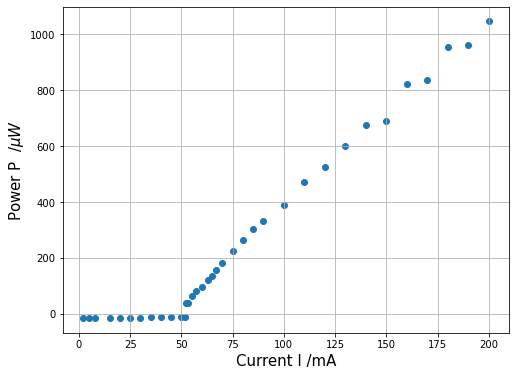

In [308]:
y_array = df["Power "].to_numpy()
x_array = df["Current "].to_numpy()

plt.figure(figsize=(8,6))
plt.scatter(x_array,y_array)
plt.xlabel("Current I /mA",fontsize=15)
plt.ylabel(r"Power P  /$\mu W$",fontsize=15)
plt.grid()

[   6.03518087 -206.23509171]
[[ 0.22049777         nan]
 [        nan 20.94763452]]


/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/2859923439.py:19: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(pcov6))


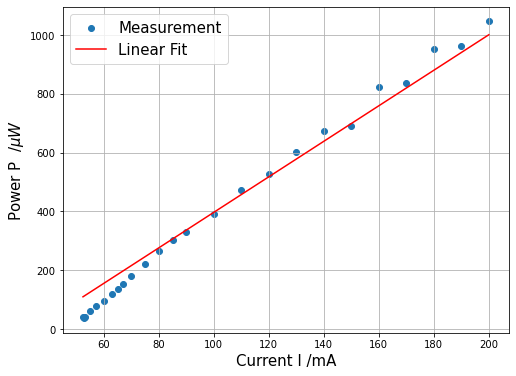

In [309]:
def linearfit(x,a,b):
    
    return a*x+b

popt6, pcov6= curve_fit(linearfit,x_array,y_array)


plt.figure(figsize=(8,6))
plt.scatter(x_array[12:],y_array[12:],label="Measurement")
plt.plot(x_array[12:], linearfit(x_array[12:], *popt6),c='red',label="Linear Fit")

plt.grid()
plt.xlabel("Current I /mA",fontsize=15)
plt.ylabel(r"Power P  /$\mu W$",fontsize=15)
plt.legend(fontsize=15)


print(popt6)
print(np.sqrt(pcov6))

In [310]:
pcov6

array([[ 4.86192658e-02, -3.81345867e+00],
       [-3.81345867e+00,  4.38803392e+02]])

In [311]:
df=pd.read_csv('Downloads/tek0005CH3#part2ourmainmeasurement.csv')

df

Model     DPO4104
0      Firmware Version        2.68
1         Waveform Type      ANALOG
2          Point Format           Y
3      Horizontal Units           s
4      Horizontal Scale       0.004
...                 ...         ...
10014        6.5112e-02  -0.0146781
10015        6.5116e-02   -0.014825
10016        6.5120e-02  -0.0149844
10017        6.5124e-02  -0.0151156
10018        6.5128e-02  -0.0152125

[10019 rows x 2 columns]

['2.5132e-02' '2.5136e-02' '2.5140e-02' ... '6.5120e-02' '6.5124e-02'
 '6.5128e-02']


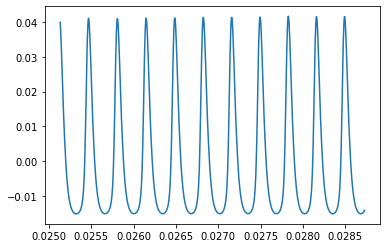

In [312]:
y_array=(df["DPO4104"][19:]).to_numpy()
x_array=(df["Model"][19:]).to_numpy()
print(x_array)

dat=[]
x=[]
for i in range(len(y_array)):
    dat.append(float(y_array[i]))
    x.append(float(x_array[i]))
    #x.append(i*0.01)
    
plt.plot(x[:900],dat[:900])


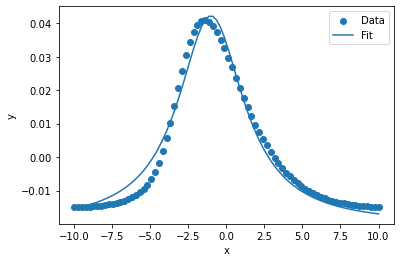

130 85 215


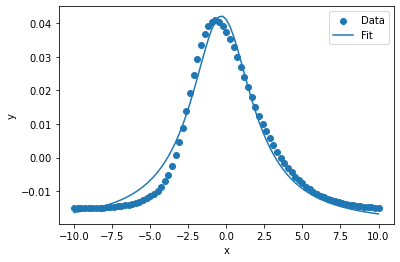

215 85 300


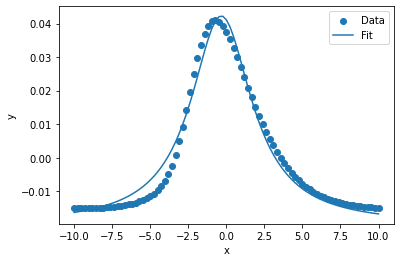

300 85 385


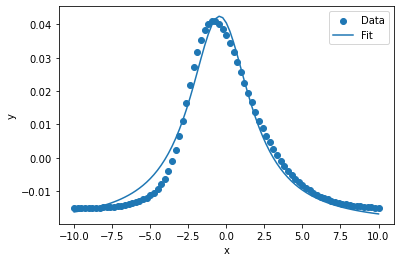

385 85 470


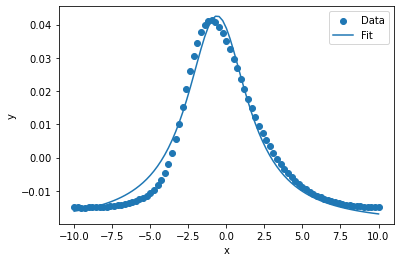

470 85 555


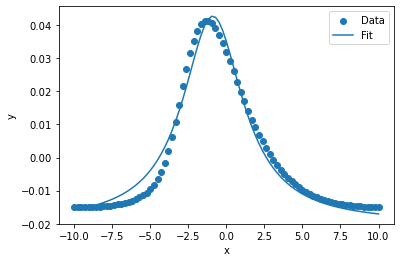

555 85 640


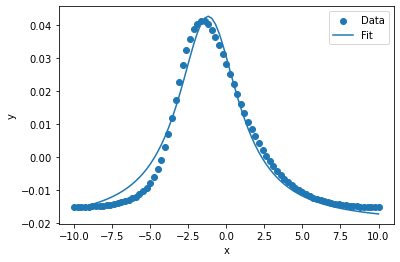

640 85 725


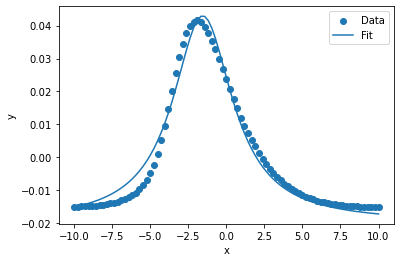

725 85 810


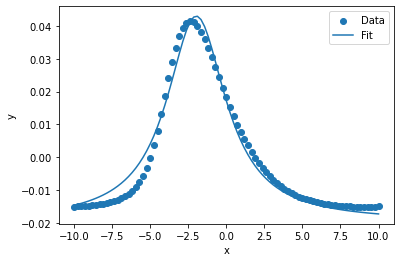

810 85 895


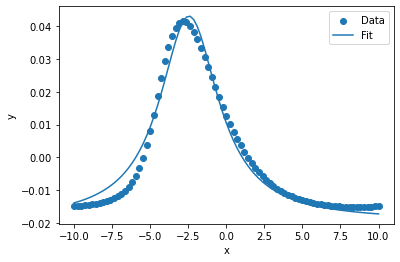

In [313]:
# Define the Lorentzian function
def lorentzian(x, x0, gamma, A,offset):
    return A * (gamma**2 / ((x - x0)**2 + gamma**2))+offset

def fitgenerator(y_dat,xmin,xmax):
    steps=xmax-xmin
    x_data = np.linspace(-10, 10, steps)
    y_data=y_dat[xmin:xmax]
    # Fit the Lorentzian function to the data
    initial_guess = [0, 1, 1,0]  # Initial parameter guess [x0, gamma, A]
    optimized_parameters, covariance = curve_fit(lorentzian, x_data, y_data, p0=initial_guess)

    # Extract the optimized parameters
    x0_opt, gamma_opt, A_opt, offset_opt = optimized_parameters

    # Generate the fitted Lorentzian curve
    y_fit = lorentzian(x_data, x0_opt, gamma_opt, A_opt, offset_opt)

    # Plot the original data and the fitted curve
    plt.scatter(x_data, y_data, label='Data')
    plt.plot(x_data, y_fit, label='Fit')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    return(optimized_parameters,covariance,y_fit)


totalydata=fitgenerator(dat,50,130)[2]
start=130

for i in range(9):
    increment=85
    end=start+increment
    print(start,increment,end)
    fitydata=fitgenerator(dat,start,end)[2]
    totalydata=np.append(totalydata,fitydata)
    start=start+increment


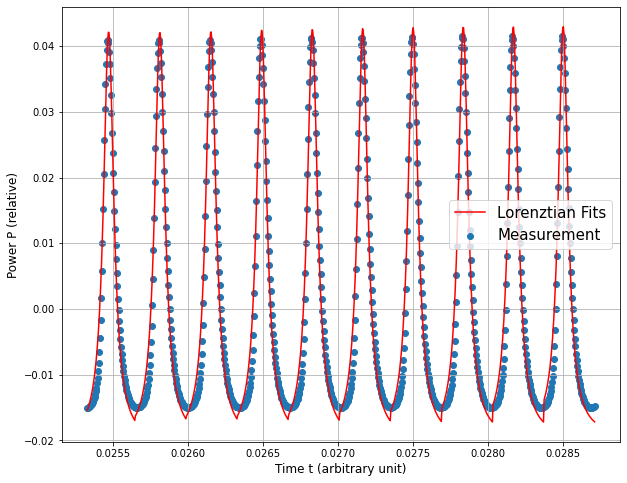

In [314]:
plt.figure(figsize=(10,8))
plt.plot(x[50:895],totalydata[:895],c='red',label="Lorenztian Fits")
plt.scatter(x[50:895],dat[50:895],label="Measurement")
plt.grid()
plt.xlabel("Time t (arbitrary unit)",fontsize=12)
plt.ylabel("Power P (relative)",fontsize=12)
plt.legend(fontsize=15)

In [315]:
x[50]

0.025332

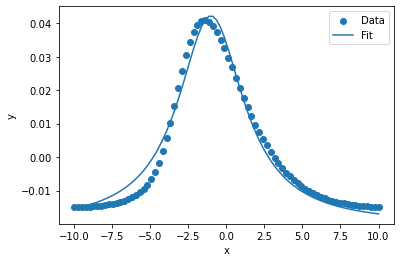

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/3942543207.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


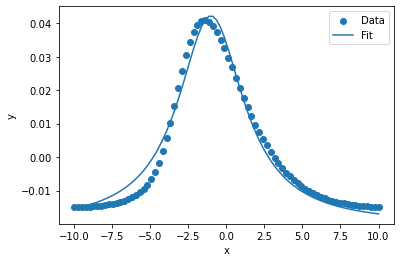

35.922481037451774


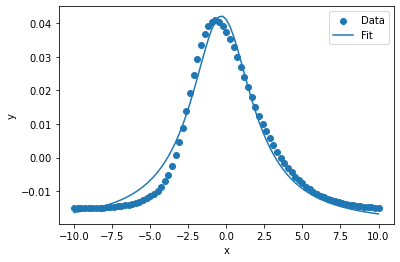

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/3942543207.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


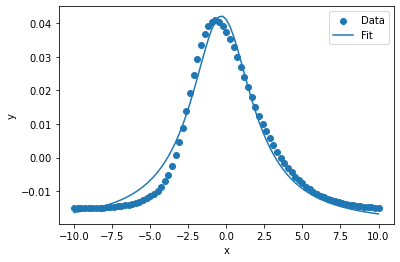

41.126317798730035


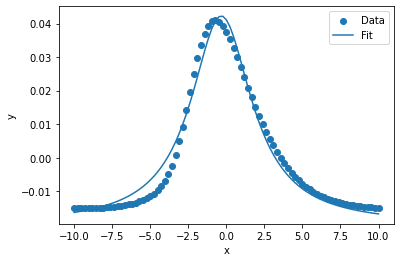

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/3942543207.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


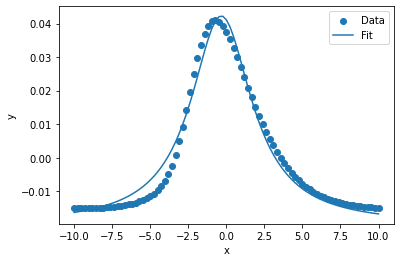

41.07993831119543


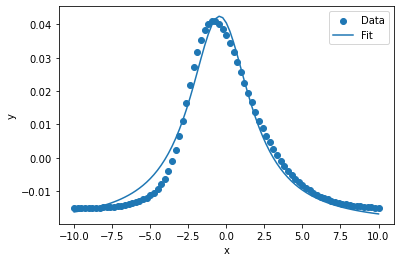

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/3942543207.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


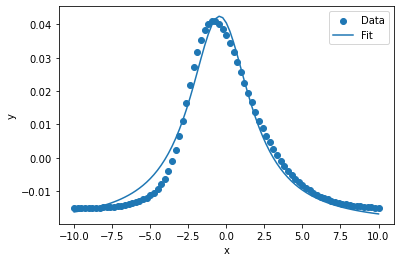

40.6160058659027


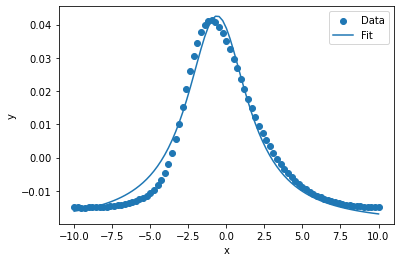

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/3942543207.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


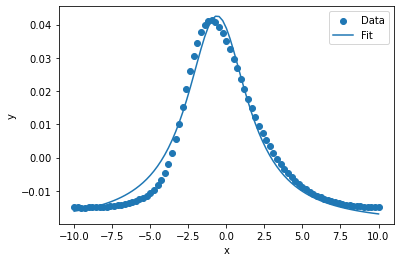

39.90653049902704


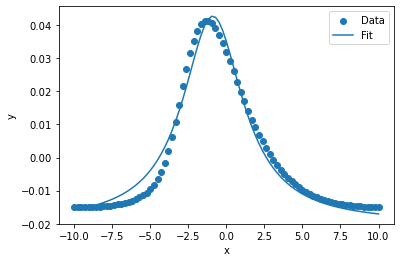

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/3942543207.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


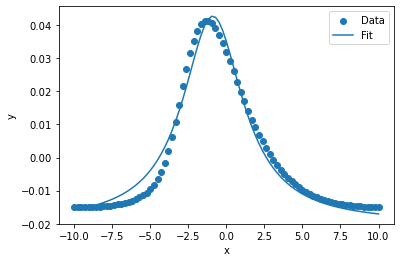

38.68932108384104


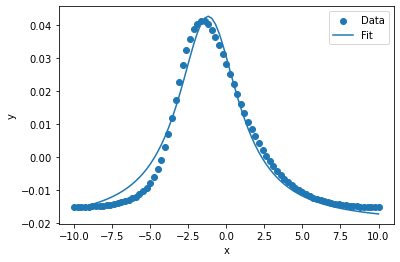

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/3942543207.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


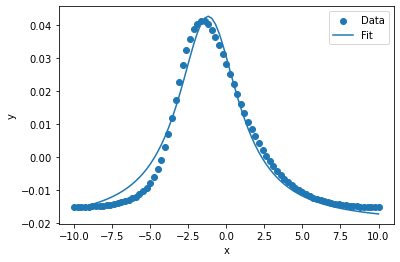

37.42072040985047


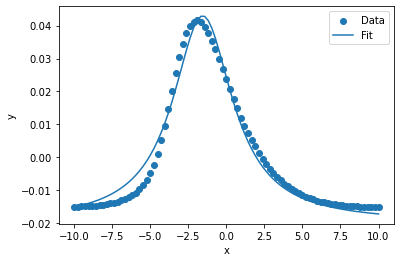

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/3942543207.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


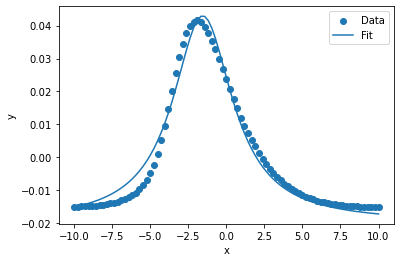

35.885335181648564


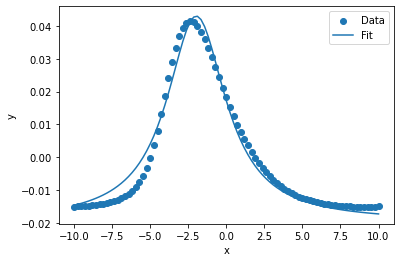

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/3942543207.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


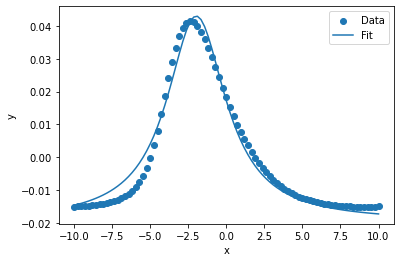

34.09982967892402


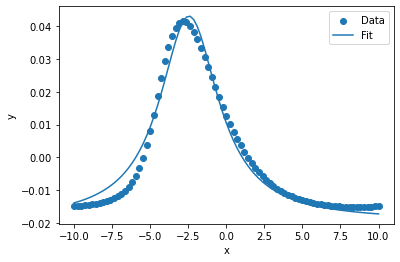

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/3942543207.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


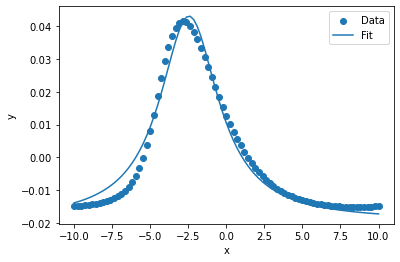

32.07421983957881


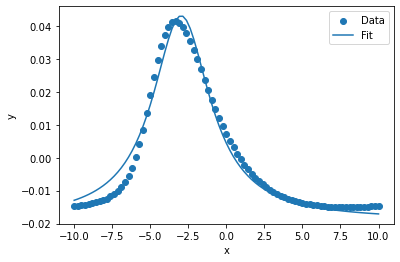

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/3942543207.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


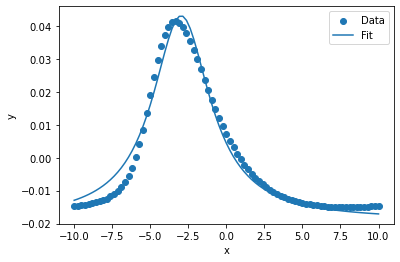

29.873286042696265


In [316]:
def parameters(x_arr,dat,xmin,xmax,increment,fitsize):
    
    covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])
    params=fitgenerator(dat,xmin,xmax)[0]
    
    x0=params[0]
    stepsize=(10+10)/fitsize
    aa=(x0+10)/stepsize   
    print(aa) ###
    X_0=x_arr[xmin]+aa*increment       #### 
    
    size=np.abs(x_arr[xmin]-x_arr[xmax])
    
    x0er=covs[0][0]
    X_0er=(x0er/20)*size
    
    g0=params[1]
    g0=g0*2    
    G_0=(g0/20)*size
    
    g0er=covs[1][1]
    g0er=g0er*2
    G_0er=(g0er/20)*size
    
    param_list=[X_0,G_0,params[2],params[3]]
    err_list=[X_0er,G_0er,covs[2][2],covs[3][3]]
    
    return param_list,err_list


p1,er1=parameters(x,dat,50,130,0.0004*0.01,80)


XList=[str(p1[0]) +str(" \pm ")+ str(er1[0])]
GList=[str(p1[1]) +str(" \pm ")+ str(er1[1])]
AList=[str(p1[2]) +str(" \pm ")+ str(er1[2])]
OffList=[str(p1[3]) +str(" \pm ")+ str(er1[3])]

numList=[130,215,300,385,470,555,640,725,810,895]

for i in range(len(numList)):
        p,er=parameters(x,dat,numList[i],numList[i]+85,0.0004*0.01,85)
        X=str(p[0]) +str(" \pm ")+ str(er[0])
        G=str(p[1]) +str(" \pm ")+ str(er[1])
        A=str(p[2]) +str(" \pm ")+ str(er[2])
        Off=str(p[3]) +str(" \pm ")+ str(er[3])
        XList.append(X)
        GList.append(G)
        AList.append(A)
        OffList.append(Off)

In [317]:
XList

['0.025475689924149808 \\pm 6.649385455128889e-07',
 '0.02581650527119492 \\pm 6.475875166484794e-07',
 '0.026156319753244783 \\pm 6.477375907475662e-07',
 '0.026494464023463612 \\pm 6.467681579625161e-07',
 '0.02683162612199611 \\pm 6.504726347674588e-07',
 '0.027166757284335364 \\pm 6.553040596842864e-07',
 '0.027501682881639403 \\pm 6.481971864837521e-07',
 '0.027835541340726595 \\pm 6.511636405078799e-07',
 '0.028168399318715696 \\pm 6.535873368684098e-07',
 '0.028500296879358317 \\pm 6.676500842637658e-07',
 '0.028831493144170786 \\pm 6.678404527695214e-07']

In [318]:
dataa={'x_0': XList, 'Gamma': GList,'A': AList,'Offset': OffList}
dataframe = pd.DataFrame(data=dataa)
dataframe.to_csv('/Users/cansuslu/Desktop/parameters.csv')

In [319]:
xdifferences=[]
xdifferr=[]
FWHM=[]
Finess=[]
finesssserr=[]
for i in range(len(XList)-1):
    xi=float(XList[i][:14])
    xipl1=float(XList[i+1][:14])
    xdiff=2*(np.abs(xipl1-xi))
    
    
    xier=float(XList[i][24:])
    xipl1er=float(XList[i+1][24:])
    xdiffer=2*(np.abs(xipl1er-xier))
    xdifferr.append(round(xdiffer,16))
    
    xdifferences.append(round(xdiff,7)*1000)
    
    
    FWHM.append(float(GList[i][:21]))
    finess=round(xdiff/(2*float(GList[i][:21])),3)
    Finess.append(round(xdiff/(2*float(GList[i][:21])),3))
    finesserr=finess*np.sqrt((xdiffer/xdiff)**2+(float(GList[i][25:])/float(GList[i][:21]))**2)
    finesssserr.append(round(finesserr,4))
    


In [320]:
xdifferences

[0.6816,
 0.6796000000000001,
 0.6763,
 0.6743,
 0.6703,
 0.6698999999999999,
 0.6677000000000001,
 0.6657,
 0.6638,
 0.6624]

In [321]:
4.151*np.sqrt(((3.807*0.0000001)/0.6624)**2+((2.767*0.1)/7.848)**2)

0.1463534276443171

In [322]:
print(xdifferr)
print(finesssserr)

[3.47020577e-08, 3.001482e-10, 1.9388656e-09, 7.4089536e-09, 9.6628498e-09, 1.42137464e-08, 5.932908e-09, 4.8473927e-09, 2.81254948e-08, 3.80737e-10]
[0.1477, 0.1425, 0.1418, 0.1425, 0.1415, 0.1442, 0.1421, 0.1426, 0.1445, 0.1468]


In [323]:
finavg=np.mean(Finess)
finavger=np.mean(finesssserr)

0.598175 5.056192923875e-07
501307.4769089313  \pm  0.7916540928435807


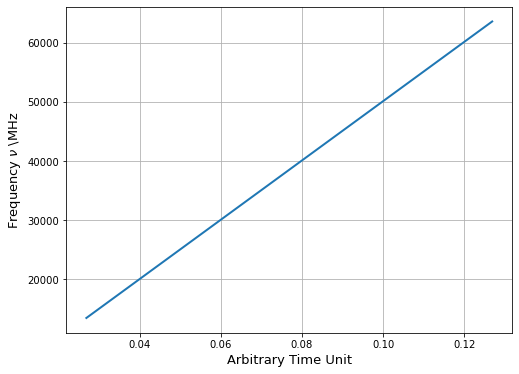

In [837]:
#conversion factor

m=149.9348 #MHZ
mer=0.0002 #MHZ

expV=np.mean(xdifferences)*0.001 #uniti 10^-3 yapmistik ondan boyle.
expVer=np.mean(xdifferr)*0.001

print(np.mean(xdifferences), np.mean(xdifferr))

conv=m*2/expV
conver=conv*np.sqrt((mer/m)**2+(expVer/expV)**2)

print(conv, " \pm ", conver)
plt.figure(figsize=(8,6))
plt.plot(x,np.array(x)*conv,linewidth=2)
plt.xlabel("Arbitrary Time Unit",fontsize=13)
plt.ylabel(r"Frequency $\nu$ \MHz",fontsize=13)
plt.grid()

In [833]:
disc=np.pi**2 - 4*finavg**2
print((-np.pi+np.sqrt(np.abs(disc)))/(2*finavg))

0.5397559797884018


In [834]:
disc=np.pi**2 - 4*0.1436**2
print((-np.pi+np.sqrt(np.abs(disc)))/(2*0.1436))


-0.04580520309778477


In [326]:
dataa={'x_diff': xdifferences, 'F': Finess}
dataframe = pd.DataFrame(data=dataa)
dataframe.to_csv('/Users/cansuslu/Desktop/finess.csv')

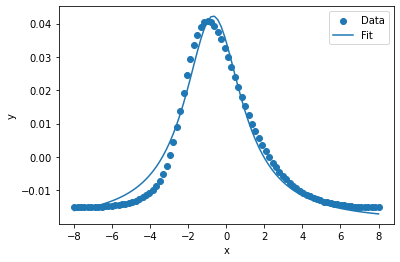

In [327]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the Lorentzian function
def lorentzian(x, x0, gamma, A,offset):
    return A * (gamma**2 / ((x - x0)**2 + gamma**2))+offset

# Generate example data
x_data1 = np.linspace(-8, 8, 90)
y_data1=dat[130:220]
# Fit the Lorentzian function to the data
initial_guess = [0, 1, 1,0]  # Initial parameter guess [x0, gamma, A]
optimized_parameters, covariance = curve_fit(lorentzian, x_data1, y_data1, p0=initial_guess)

# Extract the optimized parameters
x0_opt, gamma_opt, A_opt, offset_opt = optimized_parameters

# Generate the fitted Lorentzian curve
y_fit1 = lorentzian(x_data1, x0_opt, gamma_opt, A_opt, offset_opt)

# Plot the original data and the fitted curve
plt.scatter(x_data1, y_data1, label='Data')
plt.plot(x_data1, y_fit1, label='Fit')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [328]:
x=np.linspace(-10, 10, 170)
y=np.append(y_data0,y_data1)
yf=np.append(y_fit0,y_fit1)

plt.scatter(x,y, label='Data')
plt.plot(x, yf, label='Fit')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

NameError: name 'y_data0' is not defined

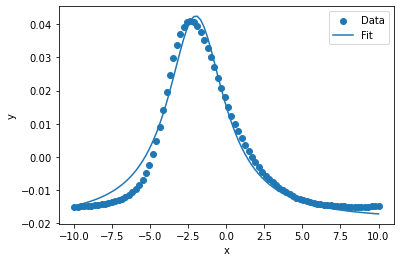

In [329]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the Lorentzian function
def lorentzian(x, x0, gamma, A,offset):
    return A * (gamma**2 / ((x - x0)**2 + gamma**2))+offset

# Generate example data
x_data = np.linspace(-10, 10, 90)
y_data=dat[220:310]
# Fit the Lorentzian function to the data
initial_guess = [0, 1, 1,0]  # Initial parameter guess [x0, gamma, A]
optimized_parameters, covariance = curve_fit(lorentzian, x_data, y_data, p0=initial_guess)

# Extract the optimized parameters
x0_opt, gamma_opt, A_opt, offset_opt = optimized_parameters

# Generate the fitted Lorentzian curve
y_fit = lorentzian(x_data, x0_opt, gamma_opt, A_opt, offset_opt)

# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, y_fit, label='Fit')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

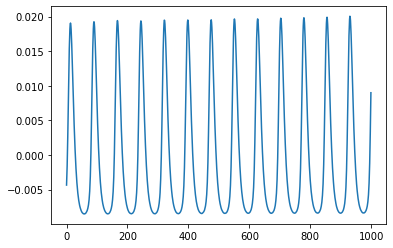

In [330]:
df=pd.read_csv('Downloads/tek0016CH3.csv')
y_array=(df["DPO4104"][19:]).to_numpy()

dat=[]
x=[]
for i in range(len(y_array)):
    dat.append(float(y_array[i]))
    #x.append(float(x_array[i]))
    x.append(i*0.01)
    
plt.plot(dat[:1000])
            

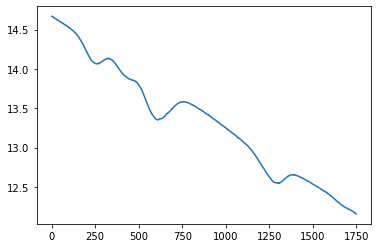

In [331]:
df=pd.read_csv('Downloads/tek0020CH2.csv')
y_array=(df["DPO4104"][19:]).to_numpy()

dat=[]
x=[]
for i in range(len(y_array)):
    dat.append(float(y_array[i]))
    #x.append(float(x_array[i]))
    x.append(i*0.01)
    
plt.plot(dat[1250:3000])

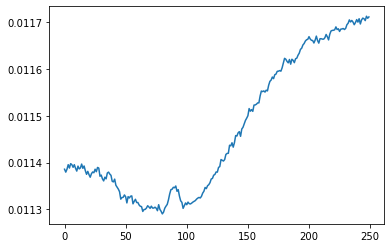

In [332]:
df=pd.read_csv('Downloads/tek0036CH2.csv')
y_array=(df["DPO4104"][19:]).to_numpy()

dat=[]
x=[]
for i in range(len(y_array)):
    dat.append(float(y_array[i]))
    #x.append(float(x_array[i]))
    x.append(i*0.01)
    
plt.plot(dat[750:1000])

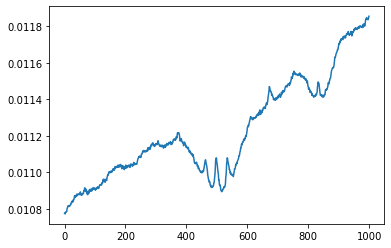

In [333]:
df=pd.read_csv('Downloads/tek0029CH2.csv')
y_array=(df["DPO4104"][19:]).to_numpy()

dat=[]
x=[]
for i in range(len(y_array)):
    dat.append(float(y_array[i]))
    #x.append(float(x_array[i]))
    x.append(i*0.01)
    
plt.plot(dat[0:1000])

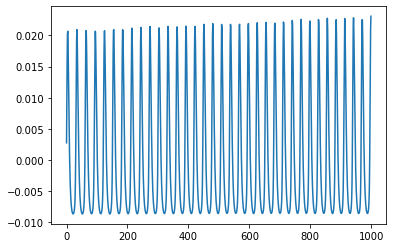

In [334]:
df=pd.read_csv('Downloads/tek0023CH3.csv')
y_array=(df["DPO4104"][19:]).to_numpy()

dat=[]
x=[]
for i in range(len(y_array)):
    dat.append(float(y_array[i]))
    #x.append(float(x_array[i]))
    x.append(i*0.01)
    
plt.plot(dat[0:1000])

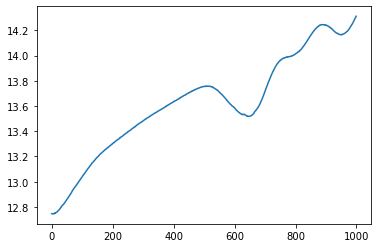

In [335]:
df=pd.read_csv('Downloads/tek0020CH2.csv')
y_array=(df["DPO4104"][19:]).to_numpy()

dat=[]
x=[]
for i in range(len(y_array)):
    dat.append(float(y_array[i]))
    #x.append(float(x_array[i]))
    x.append(i*0.01)
    
plt.plot(dat[0:1000])

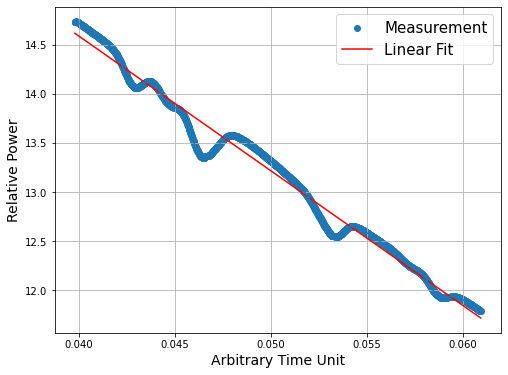

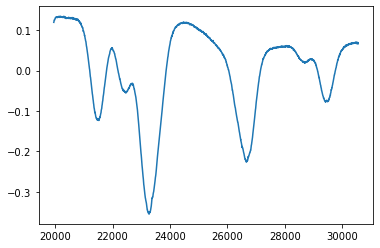

In [838]:
df=pd.read_csv('Downloads/tek0022CH2.csv')
y_array=(df["DPO4104"][19:]).to_numpy()
x_array=(df["Model"][19:]).to_numpy()
dat=[]
x=[]
for i in range(len(y_array)):
    dat.append(float(y_array[i]))
    x.append(float(x_array[i]))
    #x.append(i*0.01)

dat=np.array(dat)
x=np.array(x)
    
popt6, pcov6= curve_fit(linearfit,x[1185:3300],dat[1185:3300])


plt.figure(figsize=(8,6))
plt.scatter(x[1185:3300],dat[1185:3300],label="Measurement")
plt.plot(x[1185:3300], linearfit(x[1185:3300], *popt6),c='red',label="Linear Fit")
plt.legend(fontsize=15)
plt.xlabel("Arbitrary Time Unit",fontsize=14)
plt.ylabel("Relative Power",fontsize=14)
plt.grid()
    
plt.plot(x[1185:3300],np.array(dat[1185:3300]))

minus= dat[1185:3300]-linearfit(x[1185:3300], *popt6)

plt.show()
plt.plot(np.array(x[1185:3300])*conv,minus)

In [337]:
dataa={"t(arbitrary)"}
dataframe = pd.DataFrame(data=dataa)
dataframe.to_csv('/Users/cansuslu/Desktop/parameters.csv')

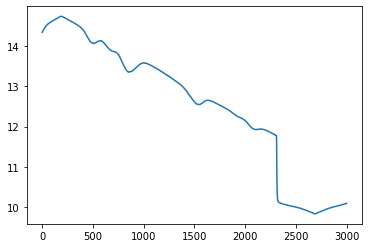

In [338]:
plt.plot(dat[1000:4000])

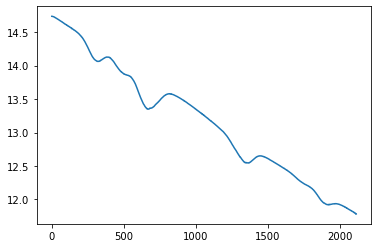

In [339]:
plt.plot(dat[1185:3300])


In [340]:
print(dat[1185:3300])

[14.7359 14.7359 14.7359 ... 11.7866 11.7884 11.7847]


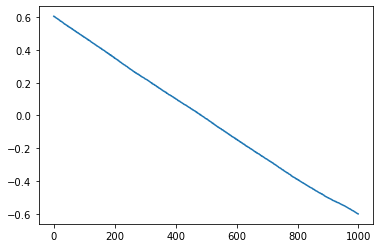

In [341]:
df=pd.read_csv('Downloads/tek0015CH1.csv')
y_array=(df["DPO4104"][19:]).to_numpy()

dat=[]
x=[]
for i in range(len(y_array)):
    dat.append(float(y_array[i]))
    #x.append(float(x_array[i]))
    x.append(i*0.01)
    
plt.plot(dat[0:1000])

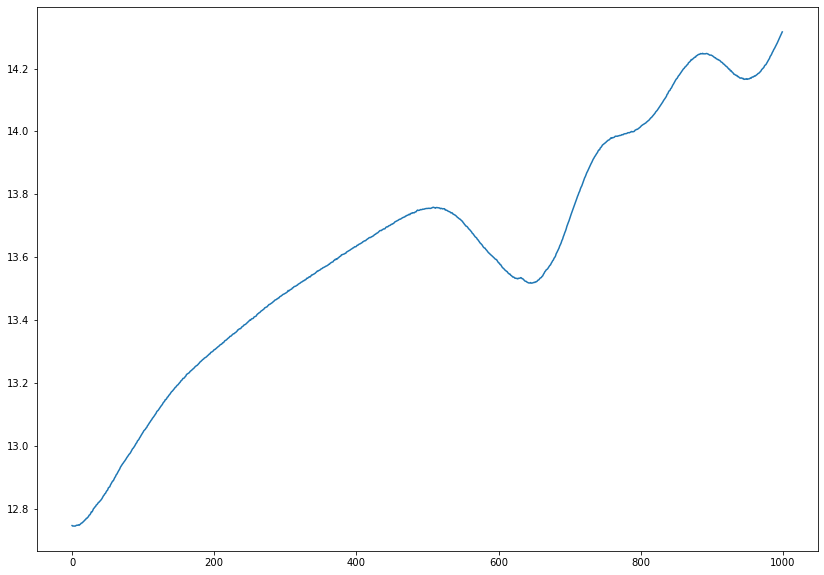

In [342]:
df=pd.read_csv('Downloads/tek0021CH2.csv')
y_array=(df["DPO4104"][19:]).to_numpy()

dat=[]
x=[]
for i in range(len(y_array)):
    dat.append(float(y_array[i]))
    #x.append(float(x_array[i]))
    x.append(i*0.01)
plt.figure(figsize=(14,10))
plt.plot(dat[0:1000])

In [343]:
df=pd.read_csv('Downloads/tek0023CH3.csv')

['2.79500e-02' '2.79600e-02' '2.79700e-02' ... '1.27920e-01' '1.27930e-01'
 '1.27940e-01']


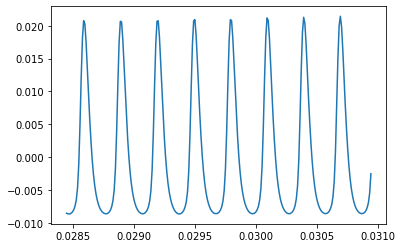

In [344]:
y_array=(df["DPO4104"][19:]).to_numpy()
x_array=(df["Model"][19:]).to_numpy()
print(x_array)

dat=[]
x=[]
for i in range(len(y_array)):
    dat.append(float(y_array[i]))
    x.append(float(x_array[i]))
    #x.append(i*0.01)
    
plt.plot(x[50:300],dat[50:300])

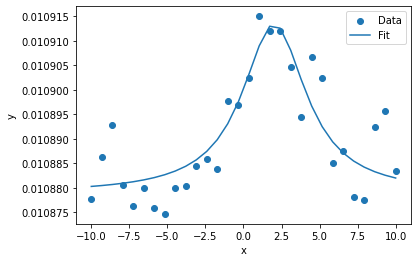

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


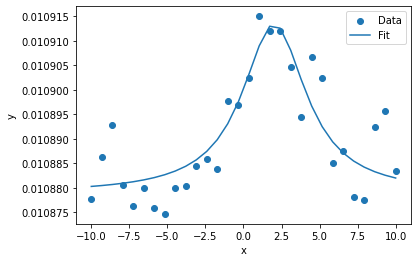

0.02736
0.00030000000000000165


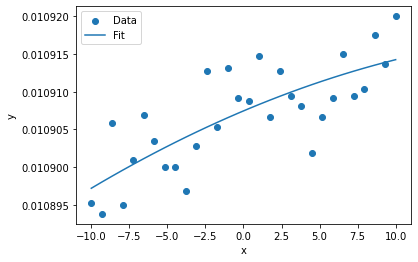

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


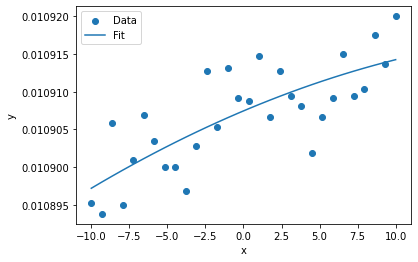

0.02766
0.0002999999999999982


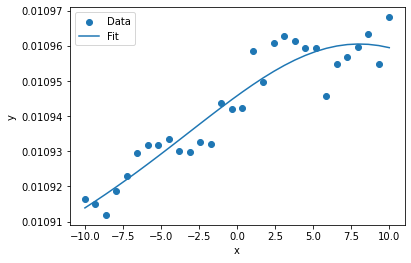

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


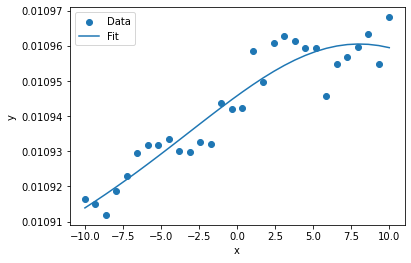

0.02796
0.00030000000000000165


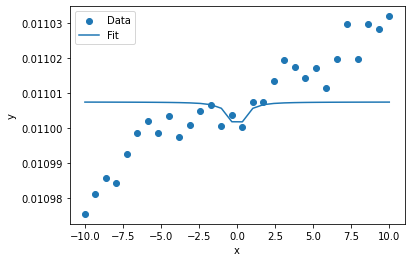

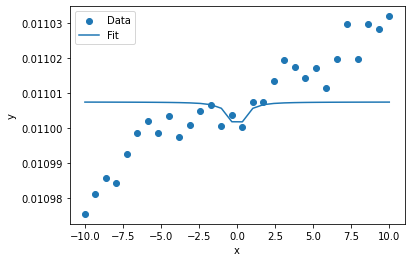

0.02826
0.0002999999999999982


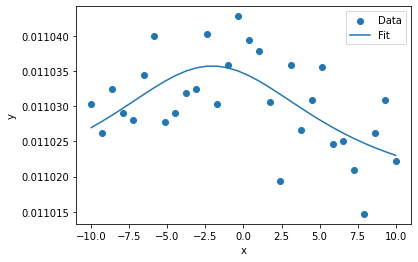

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


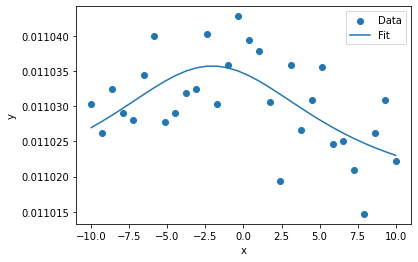

0.02856
0.00030000000000000165


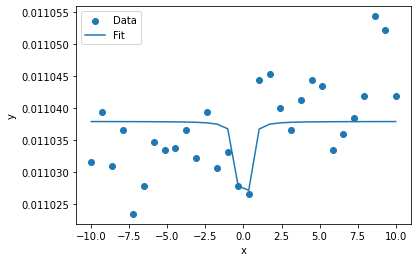

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


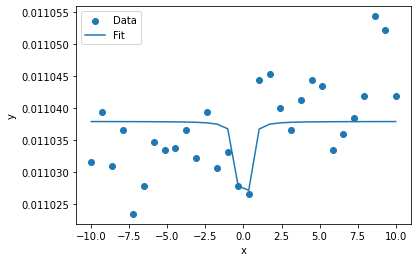

0.02886
0.0002999999999999982


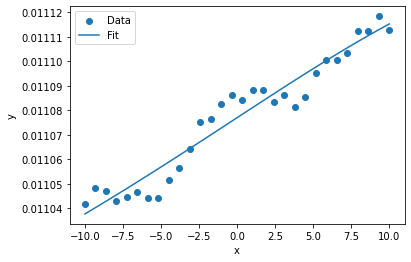

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


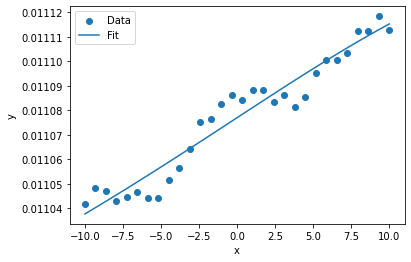

0.02916
0.00030000000000000165


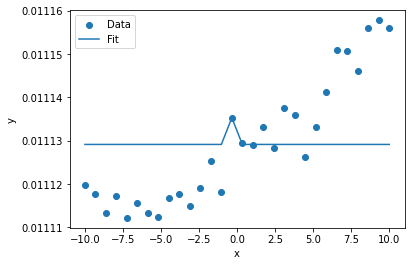

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


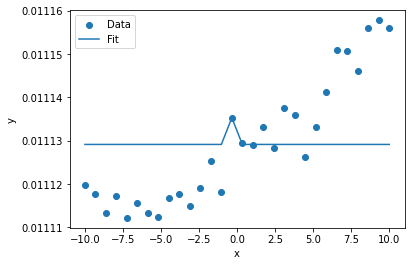

0.02946
0.00030000000000000165


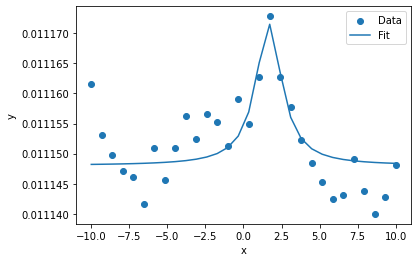

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


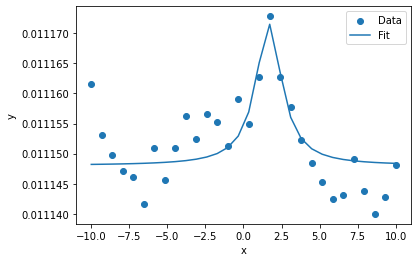

0.02976
0.0002999999999999982


In [405]:
def parameters(x_arr,dat,xmin,xmax,increment,fitsize):
    
    covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])
    params=fitgenerator(dat,xmin,xmax)[0]
    
    x0=params[0]
    stepsize=(10+10)/fitsize
    aa=(x0+10)/stepsize   
    print(x_arr[xmin]) ###
    X_0=x_arr[xmin]+aa*increment       #### 
    
    size=np.abs(x_arr[xmin]-x_arr[xmax])
    print(size)
    
    x0er=covs[0][0]
    X_0er=(x0er/20)*size
    
    g0=params[1]
    g0=g0*2    
    G_0=(g0/20)*size
    
    g0er=covs[1][1]
    g0er=g0er*2
    G_0er=(g0er/20)*size
    
    param_list=[X_0,G_0,params[2],params[3]]
    err_list=[X_0er,G_0er,covs[2][2],covs[3][3]]
    
    return param_list,err_list


p1,er1=parameters(x,dat,50,80,0.001*0.01,30)


XList=[str(p1[0]) +str(" \pm ")+ str(er1[0])]
GList=[str(p1[1]) +str(" \pm ")+ str(er1[1])]
AList=[str(p1[2]) +str(" \pm ")+ str(er1[2])]
OffList=[str(p1[3]) +str(" \pm ")+ str(er1[3])]

numList=[80,110,140,170,200,230,260,290]

for i in range(len(numList)):
        p,er=parameters(x,dat,numList[i],numList[i]+30,0.001*0.01,30)
        X=str(p[0]) +str(" \pm ")+ str(er[0])
        G=str(p[1]) +str(" \pm ")+ str(er[1])
        A=str(p[2]) +str(" \pm ")+ str(er[2])
        Off=str(p[3]) +str(" \pm ")+ str(er[3])
        XList.append(X)
        GList.append(G)
        AList.append(A)
        OffList.append(Off)

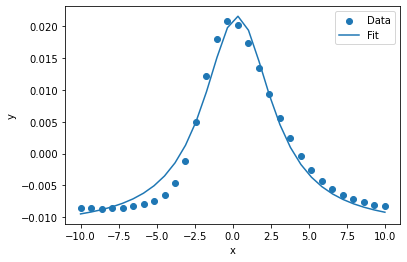

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/4012501073.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


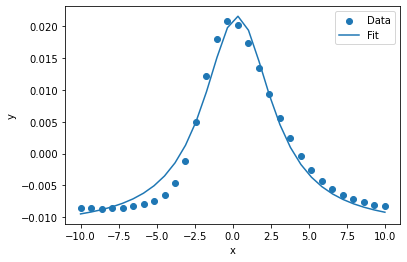

15.460945430737215


In [346]:
p1,er1=parameters(x,dat,50,80,0.001*0.01,30)



In [347]:
xdifferences=[]
xdifferr=[]
FWHM=[]
Finess=[]
finesssserr=[]
for i in range(len(XList)-1):
    xi=float(XList[i][:14])
    xipl1=float(XList[i+1][:14])
    xdiff=2*(np.abs(xipl1-xi))
    
    
    xier=float(XList[i][24:])
    xipl1er=float(XList[i+1][24:])
    xdiffer=2*(np.abs(xipl1er-xier))
    xdifferr.append(round(xdiffer,16))
    
    xdifferences.append(round(xdiff,7)*1000)
    
    
    FWHM.append(float(GList[i][:21]))
    finess=round(xdiff/(2*float(GList[i][:21])),3)
    Finess.append(round(xdiff/(2*float(GList[i][:21])),3))
    finesserr=finess*np.sqrt((xdiffer/xdiff)**2+(float(GList[i][25:])/float(GList[i][:21]))**2)
    finesssserr.append(round(finesserr,4))


501307.4769089313  \pm  0.7916540928435807


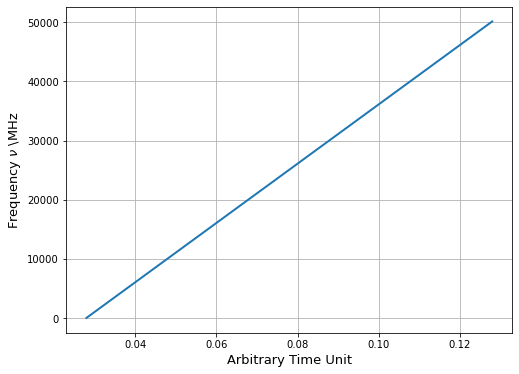

In [348]:
m=149.9348 #MHZ
mer=0.0002 #MHZ

expV=np.mean(xdifferences)*0.001 #uniti 10^-3 yapmistik ondan boyle.
expVer=np.mean(xdifferr)*0.001

conv=m*2/expV
conver=conv*np.sqrt((mer/m)**2+(expVer/expV)**2)

print(conv, " \pm ", conver)
plt.figure(figsize=(8,6))
plt.plot(x,np.array(x)*conv-np.array(x[0])*conv,linewidth=2)
plt.xlabel("Arbitrary Time Unit",fontsize=13)
plt.ylabel(r"Frequency $\nu$ \MHz",fontsize=13)
plt.grid()

In [349]:
XList

['0.028604609454307373 \\pm 1.1455150505530895e-06',
 '0.02890605075605264 \\pm 1.139844256051573e-06',
 '0.029206608508745527 \\pm 1.1354940113051247e-06',
 '0.02950697961853696 \\pm 1.1414158101038318e-06',
 '0.0298060356106738 \\pm 1.1444233620183559e-06',
 '0.030105106077167234 \\pm 1.1362880729569835e-06',
 '0.030403061216608178 \\pm 1.1460054266268894e-06',
 '0.030700613046903965 \\pm 1.1431515264269017e-06',
 '0.030997355394341276 \\pm 1.1482574450151521e-06']

<Figure size 1008x720 with 0 Axes>

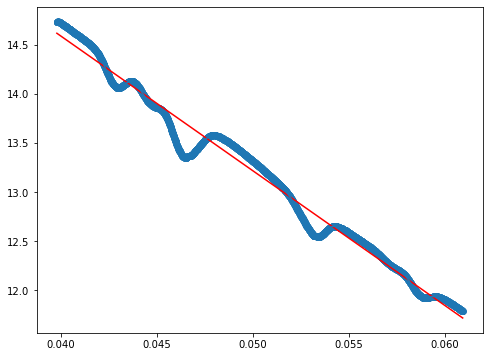

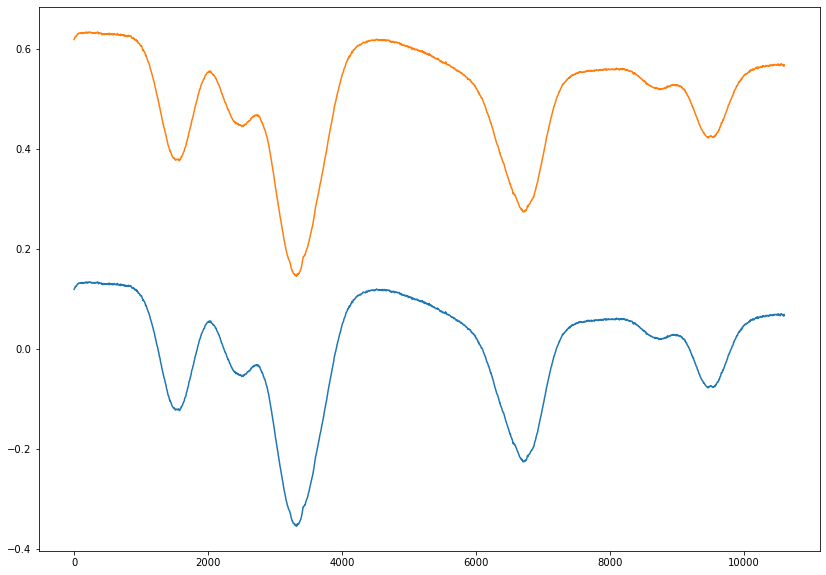

In [350]:
df=pd.read_csv('Downloads/tek0022CH2.csv')
y_array=(df["DPO4104"][19:]).to_numpy()
x_array=(df["Model"][19:]).to_numpy()
dat=[]
x=[]
for i in range(len(y_array)):
    dat.append(float(y_array[i]))
    x.append(float(x_array[i]))
    #x.append(i*0.01)

dat=np.array(dat)
x=np.array(x)
    
    

plt.figure(figsize=(14,10))
popt6, pcov6= curve_fit(linearfit,x[1185:3300],dat[1185:3300])


plt.figure(figsize=(8,6))
plt.scatter(x[1185:3300],dat[1185:3300],label="Measurement")
plt.plot(x[1185:3300], linearfit(x[1185:3300], *popt6),c='red',label="Linear Fit")

    
plt.plot(x[1185:3300],np.array(dat[1185:3300]))

minus= dat[1185:3300]-linearfit(x[1185:3300], *popt6)

plt.show()
plt.figure(figsize=(14,10))
plt.plot(np.array(x[1185:3300])*conv-np.array(x[1185])*conv,minus)
xaxis=(np.array(x[1185:3300])*conv-np.array(x[1185])*conv).tolist()
plt.plot(xaxis,np.array(minus)+0.5)

In [351]:
dataa={'Rel_freq':xaxis, 'Rel_power': np.array(minus)+0.5}
dataframe = pd.DataFrame(data=dataa)
dataframe.to_csv('/Users/cansuslu/Desktop/tek022ch2woBackground.csv')

/Users/cansuslu/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


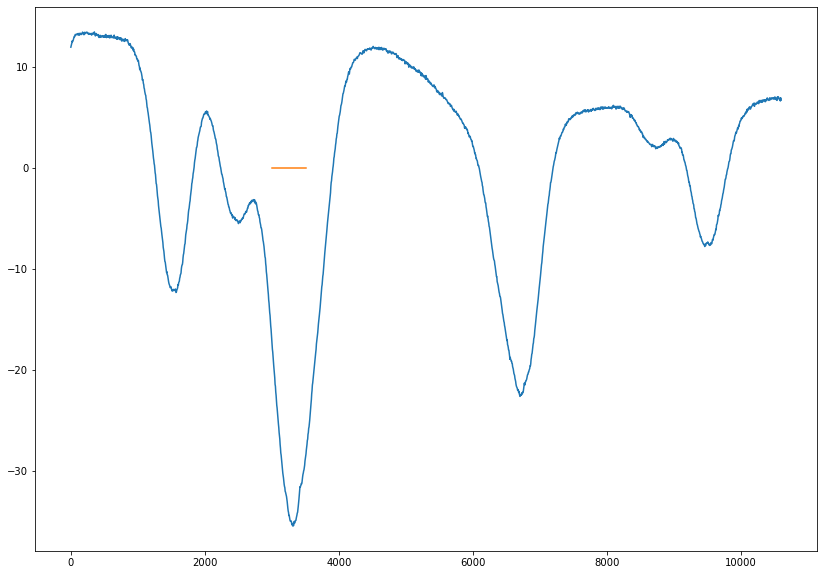

In [352]:
def gauss(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

plt.figure(figsize=(14,10))
popt6, pcov6= curve_fit(gauss,xaxis[600:700],np.array(minus*100)[600:700])

plt.plot(xaxis,np.array(minus*100))
plt.plot(xaxis[600:700],gauss(xaxis[600:700],*popt6))



/Users/cansuslu/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


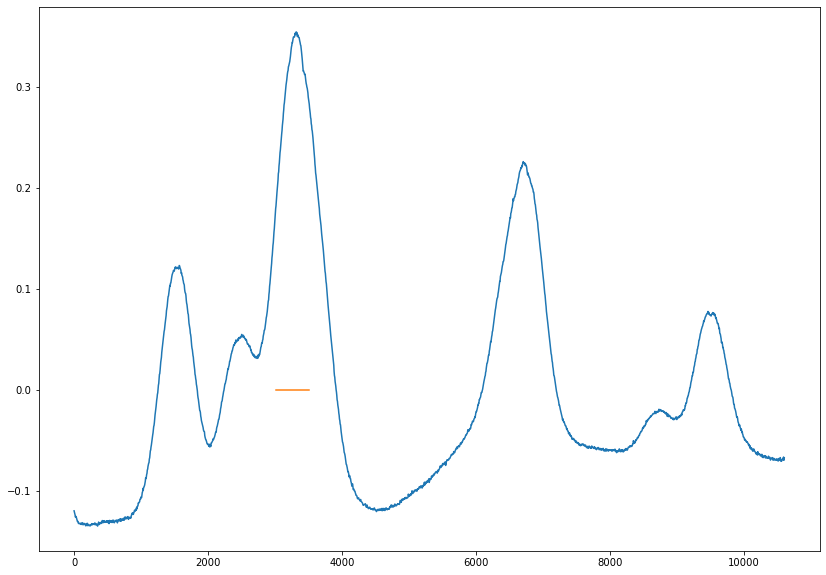

In [353]:
def gauss(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

plt.figure(figsize=(14,10))
y=-1*(np.array(minus))

popt6, pcov6= curve_fit(gauss,xaxis[600:700],y[600:700])

plt.plot(xaxis,y)
plt.plot(xaxis[600:700],gauss(xaxis[600:700],*popt6))


/Users/cansuslu/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/cansuslu/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: `ydata` must not be empty!

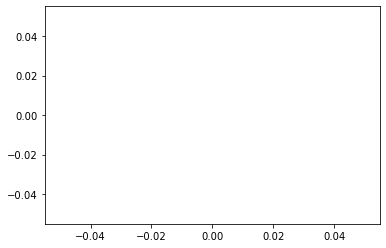

In [354]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
xdata = [ -10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
ydata = [1.2, 4.2, 6.7, 8.3, 10.6, 11.7, 13.5, 14.5, 15.7, 16.1, 16.6, 16.0, 15.4, 14.4, 14.2, 12.7, 10.3, 8.6, 6.1, 3.9, 2.1]
  
# Recast xdata and ydata into numpy arrays so we can use their handy features



xdata=xaxis[6000:7800]
ydata=y[6000:7800]

xdata = np.asarray(xdata)
ydata = np.asarray(ydata)+1
plt.plot(xdata, ydata, 'o')
  
# Define the Gaussian function
def gaus(x,x0,sigma):
    return np.exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,xdata,ydata,p0=[np.mean(ydata),np.sqrt(np.mean(ydata))])

plt.plot(xdata,gauss(xdata,*popt6))


In [ ]:
df=pd.read_csv('Downloads/tek0022CH2.csv')
y_array=(df["DPO4104"][19:]).to_numpy()
x_array=(df["Model"][19:]).to_numpy()
dat=[]
x=[]
for i in range(len(y_array)):
    dat.append(float(y_array[i]))
    x.append(float(x_array[i]))
    #x.append(i*0.01)

dat=np.array(dat)
x=np.array(x)
    
    

plt.figure(figsize=(14,10))
popt6, pcov6= curve_fit(linearfit,x[1185:3300],dat[1185:3300])


plt.figure(figsize=(8,6))
plt.scatter(x[1185:3300],dat[1185:3300],label="Measurement")
plt.plot(x[1185:3300], linearfit(x[1185:3300], *popt6),c='red',label="Linear Fit")

    
plt.plot(x[1185:3300],np.array(dat[1185:3300]))

minus= dat[1185:3300]-linearfit(x[1185:3300], *popt6)

plt.show()
plt.figure(figsize=(14,10))
plt.plot(np.array(x[1185:3300])*conv-np.array(x[1185])*conv,minus)
xaxis=(np.array(x[1185:3300])*conv-np.array(x[1185])*conv).tolist()
plt.plot(xaxis,np.array(minus)+0.5)

yaxis=np.array(minus)+0.5
plt.show()

plt.plot(xaxis[400:550],(np.array(minus)+0.5)[400:550])
np.size(xaxis)

In [ ]:
def FWHM(data,xmin,xmax):
    maximum=min(data) 
    listt=data[xmin:xmax].tolist()
    maximumindex=listt.index(min(listt))
    
    L=np.arange(xmin,xmax,1)
    
    for i in range(len(L)):
        if dat[i+xmax]<maximum:
            maximum=dat[i+xmax]
            maximumindex=i+xmax
            
    return maximum,maximumindex
            
FWHM(yaxis,1100,1600)

In [ ]:
x=[0,0,0,0,0,10,10,10,20,99,50,0,0,3]

x.index(99)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


626.6343461361648
-671.7520190579744
FWHM: -626.6343461361648


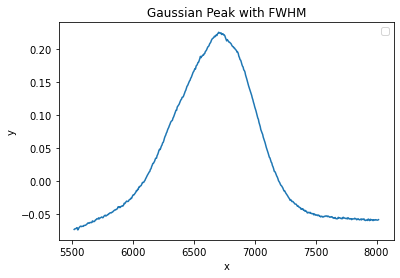

In [355]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_fwhm(x, y):
    half_max = max(y) / 2.0

    # Find indices of the points closest to the half-max value
    indices = np.where(y >= half_max)[0]
    left_index = indices[0]
    right_index = indices[-1]
    print(x[right_index]-x[left_index])
    #print(x[right_index]-x[right_index+1])
    print(2*(x[left_index]-x[int((np.where(y == max(y))[0]))]))

    # Interpolate to find the x-values corresponding to half-max
    x_left = np.interp(half_max, y[left_index:right_index+1][::-1], x[left_index:right_index+1][::-1])
    x_right = np.interp(half_max, y[left_index:right_index+1], x[left_index:right_index+1])

    
    fwhm = x_right - x_left
    return fwhm


x=xaxis[1100:1600]
y=(-1*np.array(minus))[1100:1600]

fwhm = calculate_fwhm(x, y)
print("FWHM:", fwhm)

# Plotting the peak and FWHM
plt.plot(x, y)
#plt.axhline(half_max, color='red', linestyle='--', label='Half Max')
#plt.axvline(x_left, color='green', linestyle='--', label='FWHM')
#plt.axvline(x_right, color='green', linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gaussian Peak with FWHM')
plt.show()


In [356]:
x=xaxis[1800:]
y=(-1*np.array(minus))[1800:]
fwhm = calculate_fwhm(x, y)
print("FWHM:", fwhm)

396.0329067580533
-320.8367852217125
FWHM: -396.0329067580533


997.6018790487724
-1413.6870848831823
FWHM: -997.6018790487724


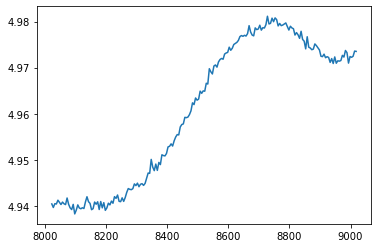

In [357]:
plt.plot(xaxis[1600:1800],(-1*np.array(minus)+5)[1600:1800])
y=(-1*np.array(minus)+5)[1600:1800]
max(y)
x=xaxis[1600:1800]
fwhm = calculate_fwhm(x, y)
print("FWHM:", fwhm)

In [358]:
int((np.where(y == max(y))[0]))

141

In [359]:
y[141]

4.981159090826548

746.9481405943079
-992.5888042796869
FWHM: -746.9481405943079


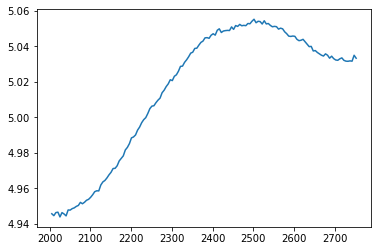

In [360]:
plt.plot(xaxis[400:550],(-1*np.array(minus)+5)[400:550])
y=(-1*np.array(minus)+5)[400:550]
max(y)
x=xaxis[400:550]
fwhm = calculate_fwhm(x, y)
print("FWHM:", fwhm)

# LAMBERT BEER

In [663]:
leftmin=[]
rightmin=[]

<Figure size 1008x720 with 0 Axes>

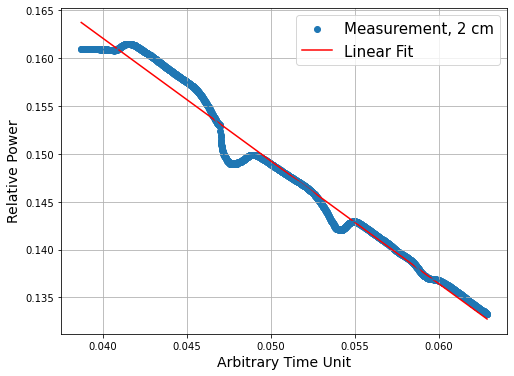

min: -0.0033795274795867525


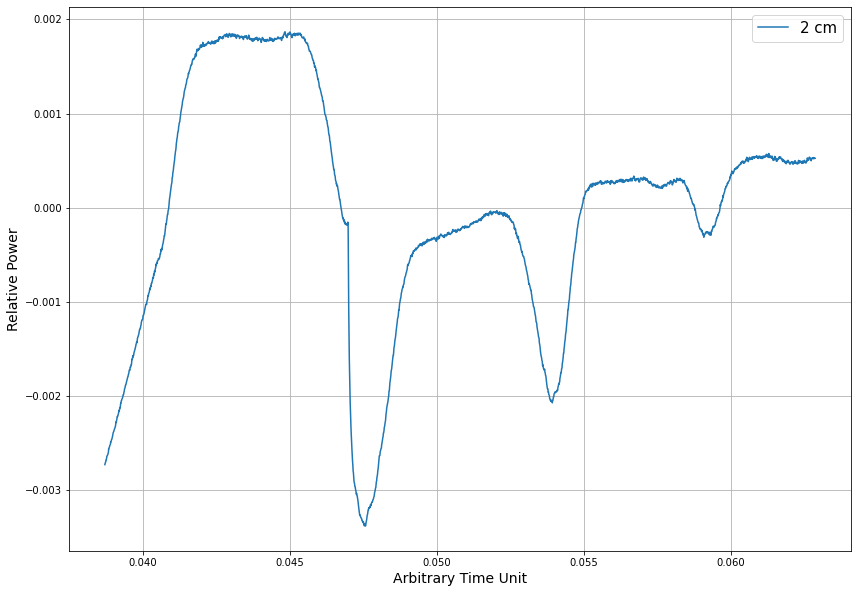

In [703]:
df=pd.read_csv('Downloads/tek0056CH2.csv')
y_array=(df["DPO4104"][19:]).to_numpy()
x_array=(df["Model"][19:]).to_numpy()
dat=[]
x=[]
for i in range(len(y_array)):
    dat.append(float(y_array[i]))
    x.append(float(x_array[i]))
    #x.append(i*0.01)

dat=np.array(dat)
x=np.array(x)


xmin=1185
xmax=3600

plt.figure(figsize=(14,10))
popt6, pcov6= curve_fit(linearfit,x[xmin:xmax],dat[xmin:xmax])


plt.figure(figsize=(8,6))
plt.scatter(x[xmin:xmax],dat[xmin:xmax],label="Measurement, 2 cm")
plt.plot(x[xmin:xmax], linearfit(x[xmin:xmax], *popt6),c='red',label="Linear Fit")
plt.legend(fontsize=15)
plt.xlabel("Arbitrary Time Unit",fontsize=14)
plt.ylabel("Relative Power",fontsize=14)
plt.grid()
    
plt.plot(x[xmin:xmax],np.array(dat[xmin:xmax]))

minus= dat[xmin:xmax]-linearfit(x[xmin:xmax], *popt6)

plt.show()
plt.figure(figsize=(14,10))
plt.plot(x[xmin:xmax],minus,label="2 cm")
plt.grid()
plt.xlabel("Arbitrary Time Unit",fontsize=14)
plt.ylabel("Relative Power",fontsize=14)
print("min:", min(minus))
plt.legend(fontsize=15)
maxfinder(minus)
leftmin.append(maxfinder(minus)[0])
rightmin.append(maxfinder(minus)[1])

<Figure size 1008x720 with 0 Axes>

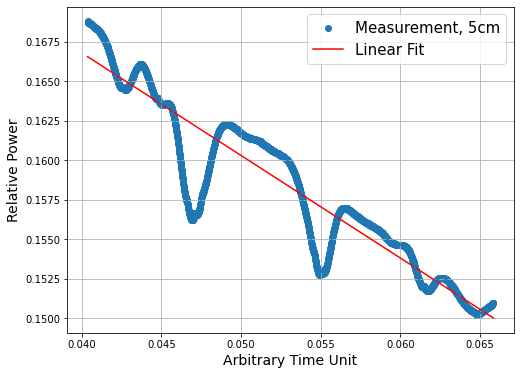

min: -0.006094966776489685


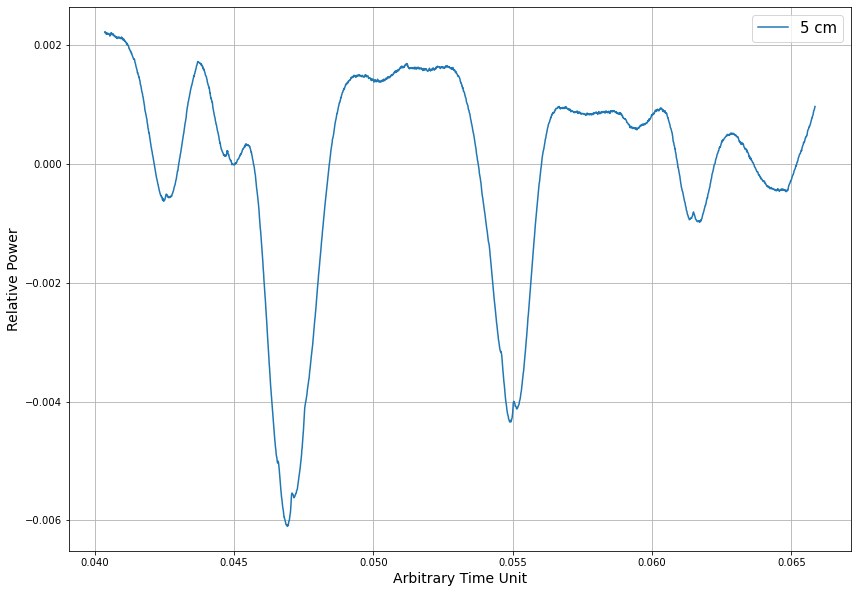

In [705]:
df=pd.read_csv('Downloads/tek0051CH2.csv')
y_array=(df["DPO4104"][19:]).to_numpy()
x_array=(df["Model"][19:]).to_numpy()
dat=[]
x=[]
for i in range(len(y_array)):
    dat.append(float(y_array[i]))
    x.append(float(x_array[i]))
    #x.append(i*0.01)

dat=np.array(dat)
x=np.array(x)


xmin=1350
xmax=3900

plt.figure(figsize=(14,10))
popt6, pcov6= curve_fit(linearfit,x[xmin:xmax],dat[xmin:xmax])


plt.figure(figsize=(8,6))
plt.scatter(x[xmin:xmax],dat[xmin:xmax],label="Measurement, 5cm")
plt.plot(x[xmin:xmax], linearfit(x[xmin:xmax], *popt6),c='red',label="Linear Fit")
plt.legend(fontsize=15)
plt.xlabel("Arbitrary Time Unit",fontsize=14)
plt.ylabel("Relative Power",fontsize=14)
plt.grid()
    
plt.plot(x[xmin:xmax],np.array(dat[xmin:xmax]))

minus= dat[xmin:xmax]-linearfit(x[xmin:xmax], *popt6)

plt.show()
plt.figure(figsize=(14,10))
plt.plot(x[xmin:xmax],minus,label="5 cm")
plt.grid()
plt.xlabel("Arbitrary Time Unit",fontsize=14)
plt.ylabel("Relative Power",fontsize=14)
print("min:", min(minus))
plt.legend(fontsize=15)

leftmin.append(maxfinder(minus)[0])
rightmin.append(maxfinder(minus)[1])

<Figure size 1008x720 with 0 Axes>

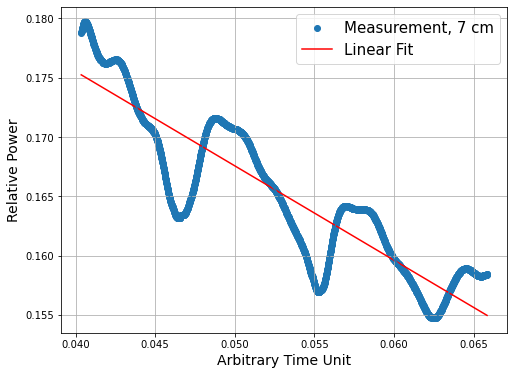

min: -0.007259019928596289


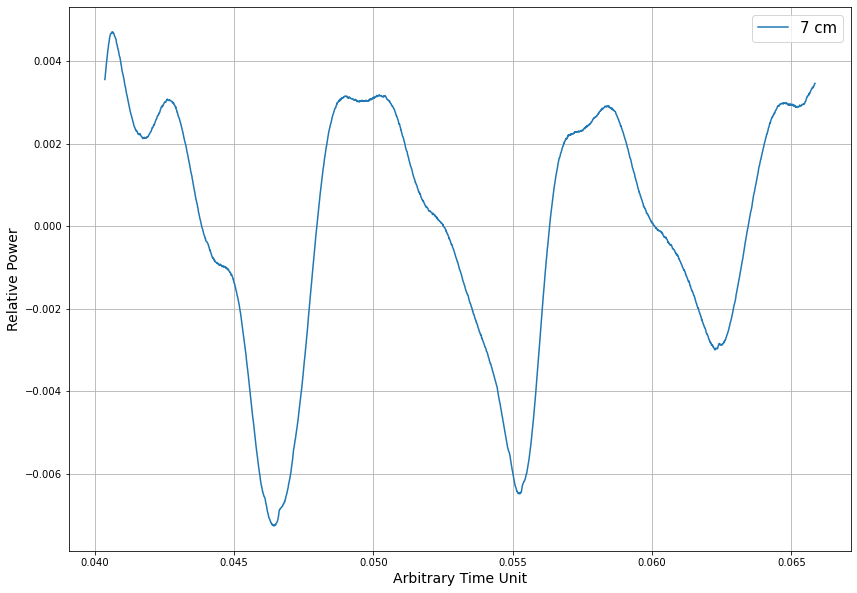

In [707]:
df=pd.read_csv('Downloads/tek0053CH2.csv')
y_array=(df["DPO4104"][19:]).to_numpy()
x_array=(df["Model"][19:]).to_numpy()
dat=[]
x=[]
for i in range(len(y_array)):
    dat.append(float(y_array[i]))
    x.append(float(x_array[i]))
    #x.append(i*0.01)

dat=np.array(dat)
x=np.array(x)


xmin=1350
xmax=3900

plt.figure(figsize=(14,10))
popt6, pcov6= curve_fit(linearfit,x[xmin:xmax],dat[xmin:xmax])


plt.figure(figsize=(8,6))
plt.scatter(x[xmin:xmax],dat[xmin:xmax],label="Measurement, 7 cm")
plt.plot(x[xmin:xmax], linearfit(x[xmin:xmax], *popt6),c='red',label="Linear Fit")
plt.legend(fontsize=15)
plt.xlabel("Arbitrary Time Unit",fontsize=14)
plt.ylabel("Relative Power",fontsize=14)
plt.grid()
    
plt.plot(x[xmin:xmax],np.array(dat[xmin:xmax]))

minus= dat[xmin:xmax]-linearfit(x[xmin:xmax], *popt6)

plt.show()
plt.figure(figsize=(14,10))
plt.plot(x[xmin:xmax],minus,label="7 cm")
plt.grid()
plt.xlabel("Arbitrary Time Unit",fontsize=14)
plt.ylabel("Relative Power",fontsize=14)
print("min:", min(minus))
plt.legend(fontsize=15)

maxfinder(minus)
leftmin.append(maxfinder(minus)[0])
rightmin.append(maxfinder(minus)[1])

In [667]:
def maxfinder(data):
    halflength=int(data.size/2)
    firstmax=min(data[:halflength])
    secmax=min(data[halflength:])
    
    return firstmax,secmax

In [668]:
maxfinder(minus)

(-0.007259019928596289, -0.006477689849779589)

In [669]:
minus.size/2

1275.0

In [670]:
np.abs(leftmin)

array([0.00337953, 0.00609497, 0.00725902])

In [671]:
np.abs(rightmin)

array([0.00207111, 0.00434187, 0.00647769])

In [672]:
lengths=[2,5,7]

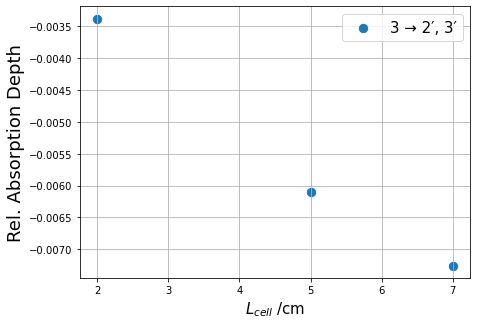

In [698]:
plt.figure(figsize=(7,5))
plt.scatter(lengths,(leftmin),s=70,label="3 → 2′, 3′")
plt.grid()
plt.xlabel(r"$L_{cell}$ /cm",fontsize=15)
plt.ylabel("Rel. Absorption Depth",fontsize=18)
plt.legend(fontsize=15)

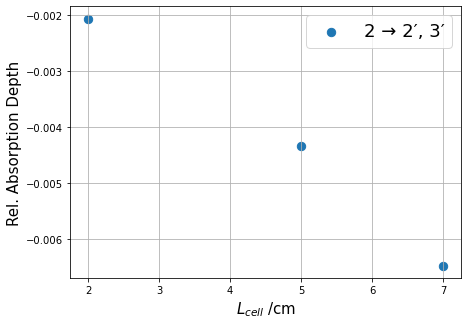

In [699]:
plt.figure(figsize=(7,5))
plt.scatter(lengths,(rightmin),s=70,label="2 → 2′, 3′")
plt.grid()
plt.xlabel(r"$L_{cell}$ /cm",fontsize=15)
plt.ylabel("Rel. Absorption Depth",fontsize=15)
plt.legend(fontsize=18)

# NONLINEAR

<Figure size 1008x720 with 0 Axes>

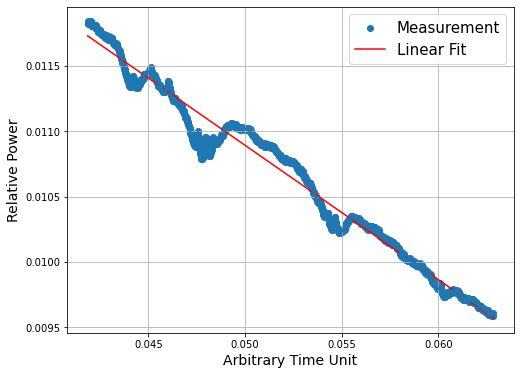

min: -0.000334780240098349


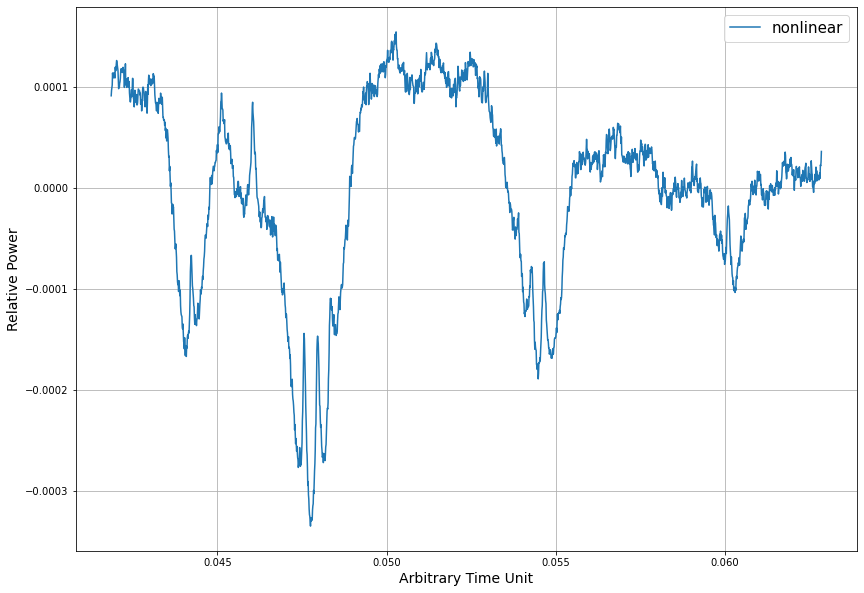

In [839]:
df=pd.read_csv('Downloads/tek0029CH2.csv')
y_array=(df["DPO4104"][19:]).to_numpy()
x_array=(df["Model"][19:]).to_numpy()
dat=[]
x=[]
for i in range(len(y_array)):
    dat.append(float(y_array[i]))
    x.append(float(x_array[i]))
    #x.append(i*0.01)

dat=np.array(dat)
x=np.array(x)


xmin=1500
xmax=3600

plt.figure(figsize=(14,10))
popt6, pcov6= curve_fit(linearfit,x[xmin:xmax],dat[xmin:xmax])


plt.figure(figsize=(8,6))
plt.scatter(x[xmin:xmax],dat[xmin:xmax],label="Measurement")
plt.plot(x[xmin:xmax], linearfit(x[xmin:xmax], *popt6),c='red',label="Linear Fit")
plt.legend(fontsize=15)
plt.xlabel("Arbitrary Time Unit",fontsize=14)
plt.ylabel("Relative Power",fontsize=14)
plt.grid()
    
    
plt.plot(x[xmin:xmax],np.array(dat[xmin:xmax]))

minus= dat[xmin:xmax]-linearfit(x[xmin:xmax], *popt6)

plt.show()
plt.figure(figsize=(14,10))
plt.plot(x[xmin:xmax],minus,label="nonlinear")
plt.grid()
plt.xlabel("Arbitrary Time Unit",fontsize=14)
plt.ylabel("Relative Power",fontsize=14)
print("min:", min(minus))
plt.legend(fontsize=15)
maxfinder(minus)
leftmin.append(maxfinder(minus)[0])
rightmin.append(maxfinder(minus)[1])

In [374]:
dataa={'Rel_freq':x[xmin:xmax], 'Rel_power': np.array(minus)}
dataframe = pd.DataFrame(data=dataa)
dataframe.to_csv('/Users/cansuslu/Desktop/nonlinear.csv')

<Figure size 1008x720 with 0 Axes>

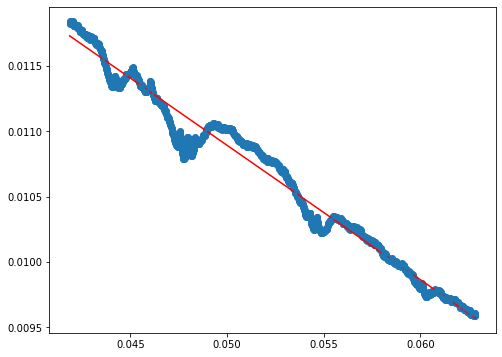

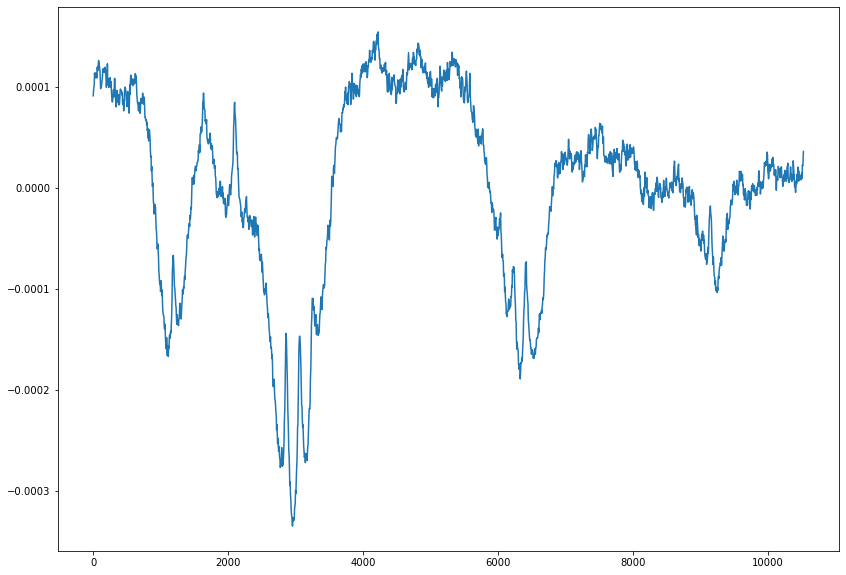

In [713]:
df=pd.read_csv('Downloads/tek0029CH2.csv')
y_array=(df["DPO4104"][19:]).to_numpy()
x_array=(df["Model"][19:]).to_numpy()
dat=[]
x=[]
for i in range(len(y_array)):
    dat.append(float(y_array[i]))
    x.append(float(x_array[i]))
    #x.append(i*0.01)

dat=np.array(dat)
x=np.array(x)
    
    

plt.figure(figsize=(14,10))
popt6, pcov6= curve_fit(linearfit,x[1500:3600],dat[1500:3600])


plt.figure(figsize=(8,6))
plt.scatter(x[1500:3600],dat[1500:3600],label="Measurement")
plt.plot(x[1500:3600], linearfit(x[1500:3600], *popt6),c='red',label="Linear Fit")

    
plt.plot(x[1500:3600],np.array(dat[1500:3600]))

minus= dat[1500:3600]-linearfit(x[1500:3600], *popt6)

plt.show()
plt.figure(figsize=(14,10))
plt.plot(np.array(x[1500:3600])*conv-np.array(x[1500])*conv,minus)
xaxis=(np.array(x[1500:3600])*conv-np.array(x[1500])*conv).tolist()



In [714]:
dataa={'Rel_freq':xaxis, 'Rel_power': np.array(minus)}
dataframe = pd.DataFrame(data=dataa)
dataframe.to_csv('/Users/cansuslu/Desktop/nonlinear.csv')

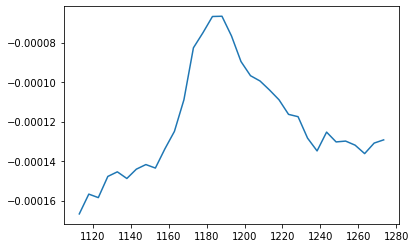

In [715]:
plt.plot(xaxis[222:255],minus[222:255])

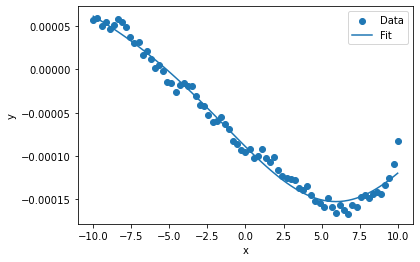

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


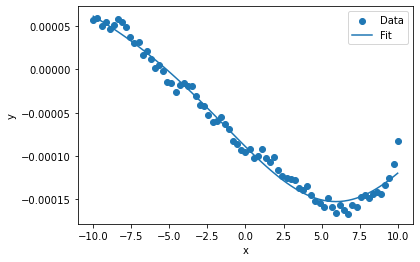

802.0919630542885
375.98060768170035
[1101.037039244316, 472.3310345240988, -0.0003468079824755338, 0.00019429309723160583]
[2.9059169818859196, 28.362811258128524, 1.7060587922764352e-05, 1.7928864969489038e-05]


In [716]:
p1,er1=parameters(xaxis, np.array(minus),160,235,5,75)
print(p1)
print(er1)

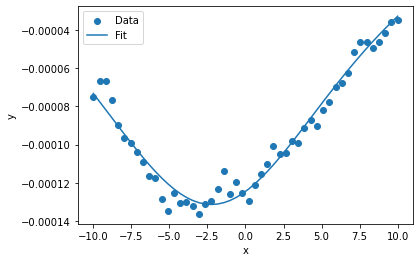

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


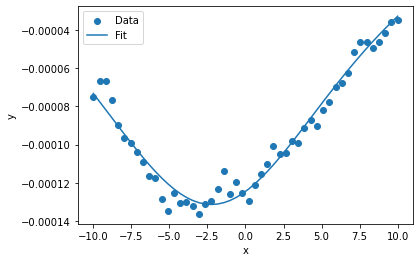

1178.0725707359888
250.65373845446447
[1275.0438551896564, 287.4955879944094, -0.0001845638940266574, 5.329706517560206e-05]
[1.4551940235131882, 29.3810796994342, 2.0944709777314076e-05, 2.1732039892299114e-05]


In [717]:

p1,er1=parameters(xaxis, np.array(minus),235,285,5,50)
print(p1)
print(er1)

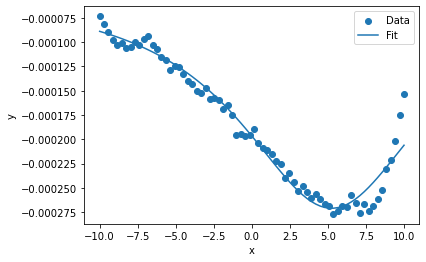

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


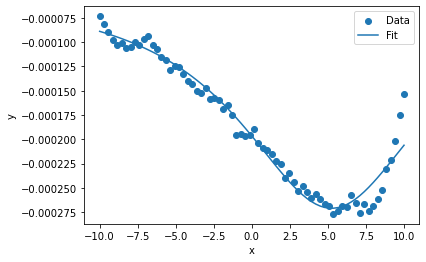

2506.5373845446557
350.915233836251
[2773.3187416352353, 263.0406517286428, -0.00022595183124233655, -4.493354580371778e-05]
[2.253141346027624, 16.228810939289435, 7.747918598688207e-06, 8.578654277405051e-06]


In [718]:

p1,er1=parameters(xaxis, np.array(minus),500,570,5,70)
print(p1)
print(er1)

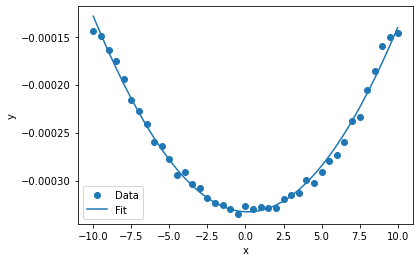

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


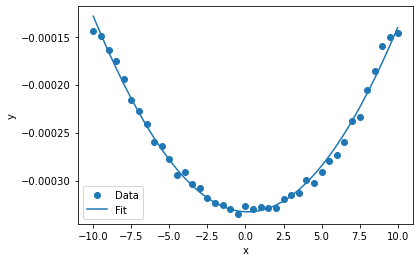

2857.4526183809066
205.53606553266218
[2961.555252928342, 1003.272367263586, -0.004915688477405544, 0.0045830164580673615]
[0.4320884008918734, 725.7738703319069, 0.006853915974436483, 0.006855007289140701]


In [719]:
p1,er1=parameters(xaxis, np.array(minus),570,611,5,41)
print(p1)
print(er1)

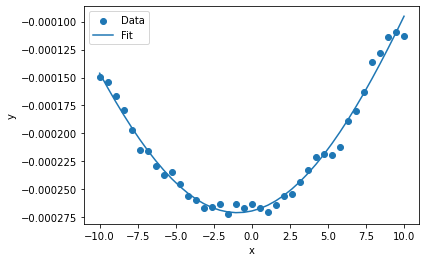

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


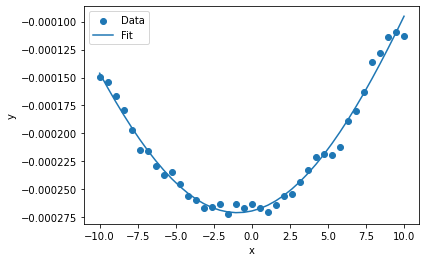

3062.988683913569
195.5099159944839
[3153.441219880465, 568.8469944743399, -0.0014140118376510264, 0.0011432166657266915]
[0.6766163477066537, 191.9161626302165, 0.0008582961928175457, 0.0008594326289007015]


In [720]:
p1,er1=parameters(xaxis, np.array(minus),611,650,5,40)
print(p1)
print(er1)

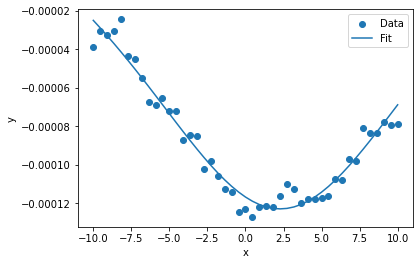

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


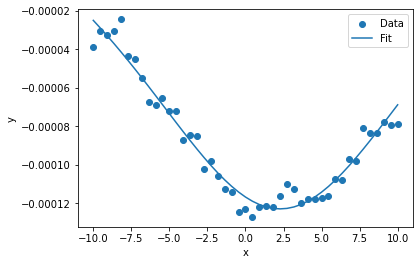

6015.6897229071765
225.58836460901875
[6153.81045028601, 294.75271774105556, -0.00020879031029619202, 8.579068361743683e-05]
[1.514978023013386, 38.24525589447403, 3.3055018628432375e-05, 3.394961407357445e-05]


In [721]:
p1,er1=parameters(xaxis, np.array(minus),1200,1245,5,45)
print(p1)
print(er1)

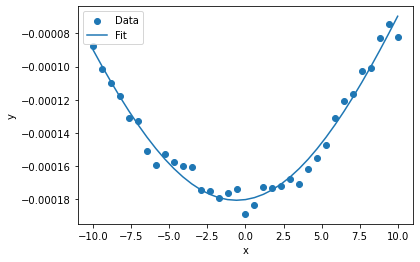

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


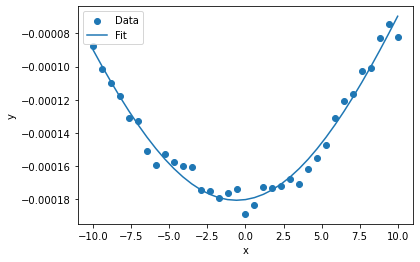

6241.278087516195
175.45761691812731
[6323.647375547953, 454.88822764244446, -0.0007777193806742432, 0.0005969957186981383]
[0.7983801738357041, 191.38834147382002, 0.0005760176242731284, 0.0005771156919365393]


In [722]:

p1,er1=parameters(xaxis, np.array(minus),1245,1280,5,35)
print(p1)
print(er1)

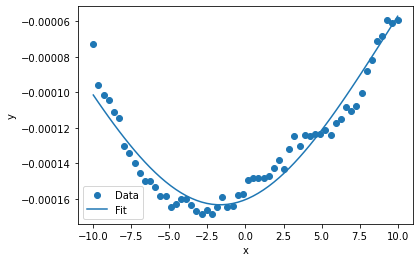

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


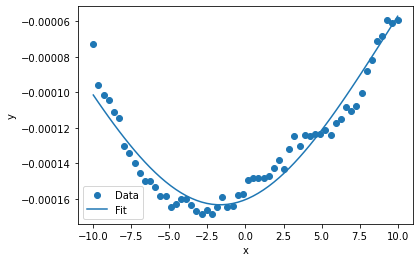

6416.7357044343225
300.7844861453559
[6541.616680601367, 596.3408705846273, -0.0004127468964346213, 0.00024932200210424273]
[2.064461678460502, 159.1842769571087, 0.00017500109581070498, 0.00017608918871926145]


In [723]:
p1,er1=parameters(xaxis, np.array(minus),1280,1340,5,60)
print(p1)
print(er1)

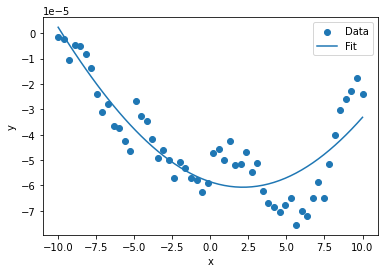

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


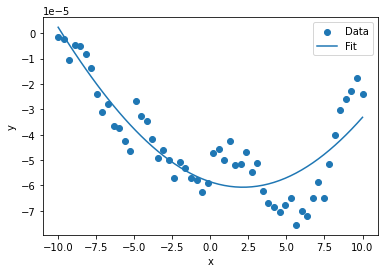

8873.142341288087
280.73218706899934
[9043.153374275196, 1217.3145688813981, -0.0008665035127413698, 0.0008058156013858929]
[4.784587000207933, 2396.5894983086387, 0.0032141378153677093, 0.00321546936254452]


In [724]:
p1,er1=parameters(xaxis, np.array(minus),1770,1826,5,56)
print(p1)
print(er1)

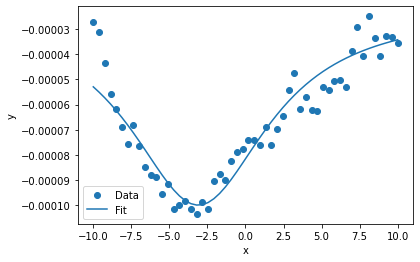

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


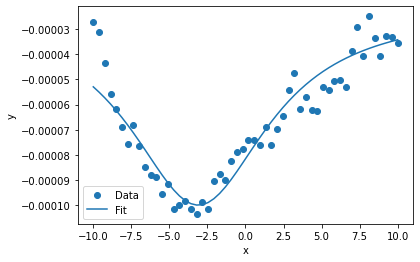

9153.874528357086
270.70603753082105
[9250.45709128548, 150.5031784053763, -7.734035057067256e-05, -2.252342797311805e-05]
[2.5359411411571218, 17.651104662099012, 5.099152700693134e-06, 5.454057371908261e-06]


In [725]:
p1,er1=parameters(xaxis, np.array(minus),1826,1880,5,56)
print(p1)
print(er1)

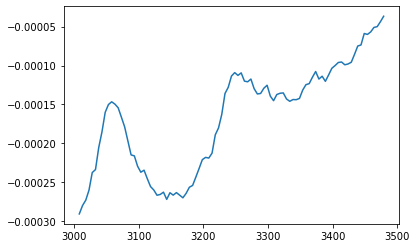

In [726]:
plt.plot(xaxis[600:695],minus[600:695])

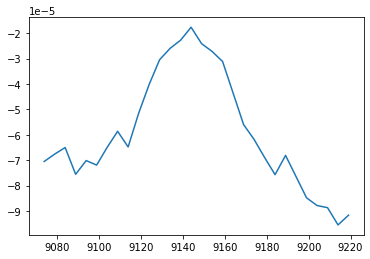

In [756]:
plt.plot(xaxis[1810:1840],minus[1810:1840])

In [778]:
XList=[]
GList=[]
AList=[]
OffList=[]


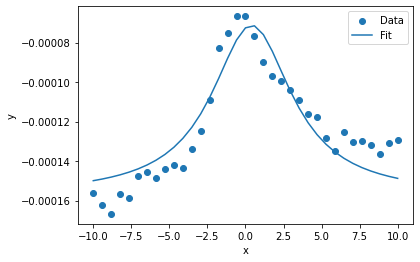

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


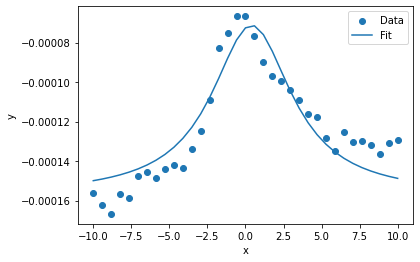

1102.8764491996517
175.45761691812368


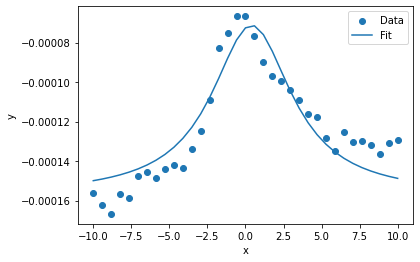

In [779]:
#Doppler1
p1,er1=parameters(xaxis, np.array(minus),220,255,5,35)

X=str(round(p1[0],3)) +str(" \pm ")+ str(round(er1[0],3))
G=str(round(p1[1],3)) +str(" \pm ")+ str(round(er1[1],3))
A=str(p1[2]) +str(" \pm ")+ str(er1[2])
Off=str(p1[3]) +str(" \pm ")+ str(er1[3])
XList.append(X)
GList.append(G)
AList.append(A)
OffList.append(Off)
        
fitydatad1=fitgenerator(np.array(minus),220,255)[2]
xd1=xaxis[220:255]

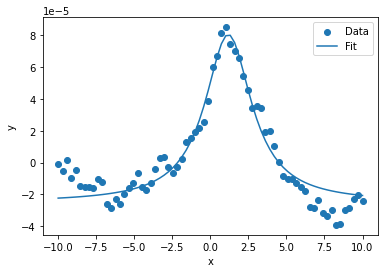

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


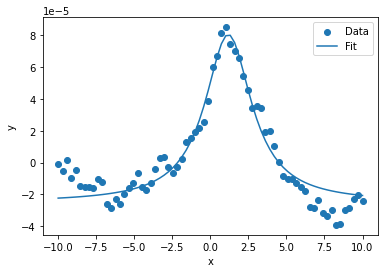

1904.9684122539402
350.915233836251
[2100.551910886124, 65.36827563827471, 0.00010574403064603802, -2.520683577491641e-05]
[1.2898292954290342, 5.069632346988983, 4.276198575350285e-06, 2.077051908924358e-06]


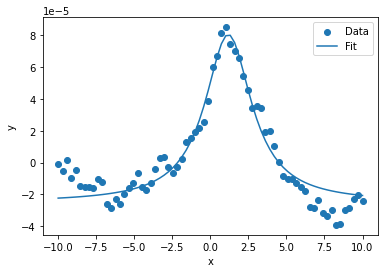

In [780]:
#Doppler2
p1,er1=parameters(xaxis, np.array(minus),380,450,5,70)
print(p1)
X=str(round(p1[0],3)) +str(" \pm ")+ str(round(er1[0],3))
G=str(round(p1[1],3)) +str(" \pm ")+ str(round(er1[1],3))
A=str(p1[2]) +str(" \pm ")+ str(er1[2])
Off=str(p1[3]) +str(" \pm ")+ str(er1[3])
XList.append(X)
GList.append(G)
AList.append(A)
OffList.append(Off)
print(er1)
fitydatad2=fitgenerator(np.array(minus),380,450)[2]
xd2=xaxis[380:450]

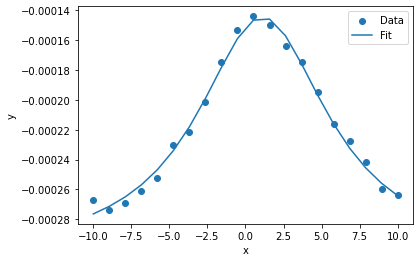

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


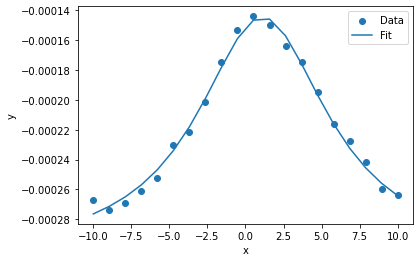

2807.321870690019
100.26149538178288
[2862.882853311468, 52.53759915703285, 0.00016128350792974936, -0.0003058165272423756]
[0.40000418981582764, 3.116883064108135, 5.3156622106533e-06, 5.840471404505628e-06]


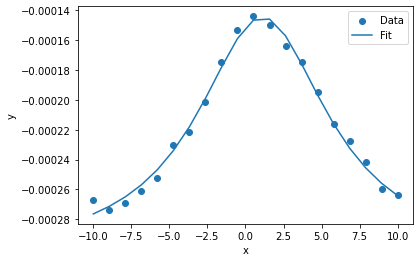

In [781]:
#Doppler3
p1,er1=parameters(xaxis, np.array(minus),560,580,5,20)
print(p1)
print(er1)
X=str(round(p1[0],3)) +str(" \pm ")+ str(round(er1[0],3))
G=str(round(p1[1],3)) +str(" \pm ")+ str(round(er1[1],3))
A=str(p1[2]) +str(" \pm ")+ str(er1[2])
Off=str(p1[3]) +str(" \pm ")+ str(er1[3])
XList.append(X)
GList.append(G)
AList.append(A)
OffList.append(Off)
fitydatad3=fitgenerator(np.array(minus),560,580)[2]

xd3=xaxis[560:580]

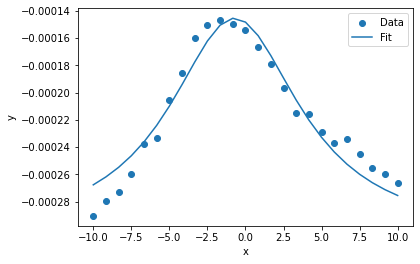

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


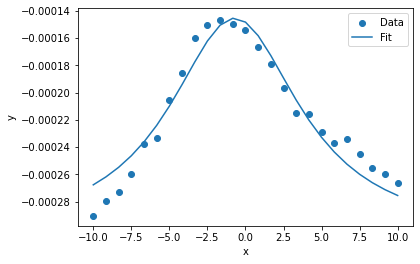

3007.8448614535882
125.32686922723224
[3065.8926972010345, 65.81023454066975, 0.00016162825311411398, -0.0003068749993910801]
[1.1612903253275304, 9.398610717297416, 1.2991918844441214e-05, 1.436061771090726e-05]


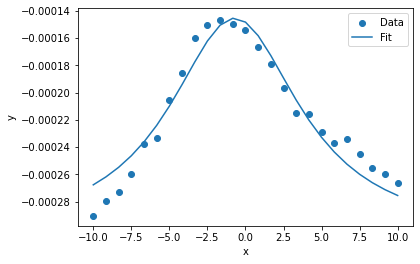

In [782]:
#Crossover1
p1,er1=parameters(xaxis, np.array(minus),600,625,5,25)
print(p1)
print(er1)
X=str(round(p1[0],3)) +str(" \pm ")+ str(round(er1[0],3))
G=str(round(p1[1],3)) +str(" \pm ")+ str(round(er1[1],3))
A=str(p1[2]) +str(" \pm ")+ str(er1[2])
Off=str(p1[3]) +str(" \pm ")+ str(er1[3])
XList.append(X)
GList.append(G)
AList.append(A)
OffList.append(Off)
fitydatac1=fitgenerator(np.array(minus),600,625)[2]


xc1=xaxis[600:625]

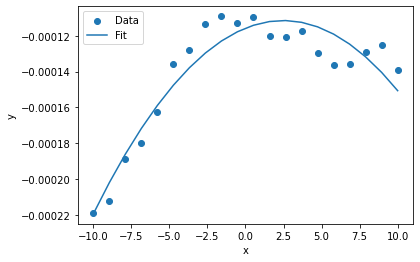

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


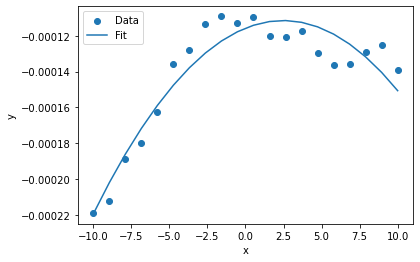

3208.3678522171613
100.26149538178652
[3348.799432550616, -9148.022899884561, 0.5771551203979252, -0.5772666197707601]
[1.8199993286013736, nan, nan, nan]


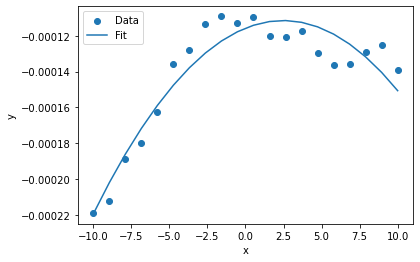

In [783]:
#Doppler4
p1,er1=parameters(xaxis, np.array(minus),640,660,5,45)
print(p1)
print(er1)
X=str(round(p1[0],3)) +str(" \pm ")+ str(round(er1[0],3))
G=str(round(p1[1],3)) +str(" \pm ")+ str(round(er1[1],3))
A=str(p1[2]) +str(" \pm ")+ str(er1[2])
Off=str(p1[3]) +str(" \pm ")+ str(er1[3])
XList.append(X)
GList.append(G)
AList.append(A)
OffList.append(Off)
fitydatad4=fitgenerator(np.array(minus),640,660)[2]
xd4=xaxis[640:660]

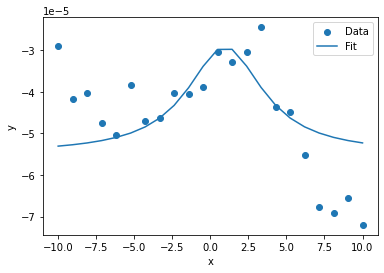

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


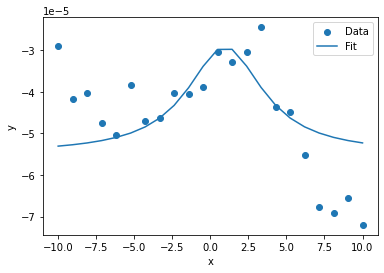

5965.558975216285
110.28764491996117
[6006.6537285892655, 33.45286176693448, 2.5694950903291043e-05, -5.490806926439571e-05]
[4.894782597702575, 24.085503450046268, 8.612775113258932e-06, 6.844418935850575e-06]


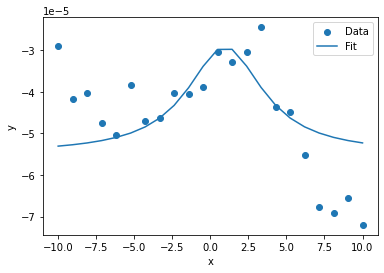

In [784]:

#Doppler5
p1,er1=parameters(xaxis, np.array(minus),1190,1212,5,15)
print(p1)
print(er1)
X=str(round(p1[0],3)) +str(" \pm ")+ str(round(er1[0],3))
G=str(round(p1[1],3)) +str(" \pm ")+ str(round(er1[1],3))
A=str(p1[2]) +str(" \pm ")+ str(er1[2])
Off=str(p1[3]) +str(" \pm ")+ str(er1[3])
XList.append(X)
GList.append(G)
AList.append(A)
OffList.append(Off)
fitydatad5=fitgenerator(np.array(minus),1190,1212)[2]

xd5=xaxis[1190:1212]

In [785]:
XList

['1193.885 \\pm 1.797',
 '2100.552 \\pm 1.29',
 '2862.883 \\pm 0.4',
 '3065.893 \\pm 1.161',
 '3348.799 \\pm 1.82',
 '6006.654 \\pm 4.895']

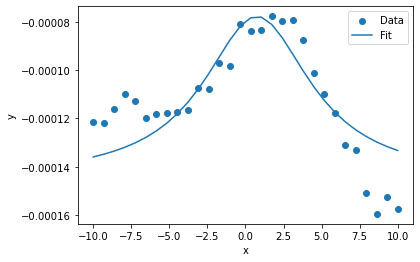

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


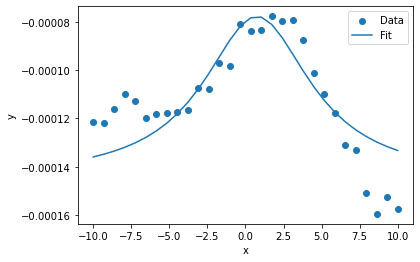

6141.016592134409
150.39224307267796
[6221.6232756038, 64.56446372872615, 6.753725785478937e-05, -0.00014523147747677332]
[3.001857075544988, 19.6890970235486, 1.0129789371090527e-05, 1.063093111961177e-05]


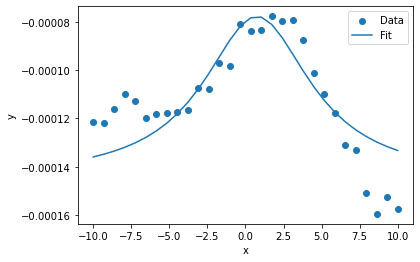

In [786]:
#Crossover2
p1,er1=parameters(xaxis, np.array(minus),1225,1255,5,30)
print(p1)
print(er1)
X=str(round(p1[0],3)) +str(" \pm ")+ str(round(er1[0],3))
G=str(round(p1[1],3)) +str(" \pm ")+ str(round(er1[1],3))
A=str(p1[2]) +str(" \pm ")+ str(er1[2])
Off=str(p1[3]) +str(" \pm ")+ str(er1[3])
XList.append(X)
GList.append(G)
AList.append(A)
OffList.append(Off)
fitydatac2=fitgenerator(np.array(minus),1225,1255)[2]
xc2=xaxis[1225:1255]

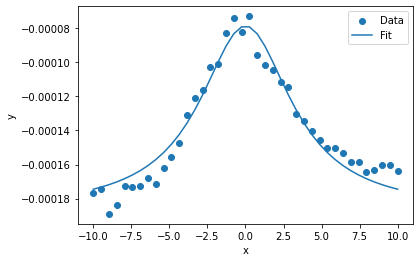

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


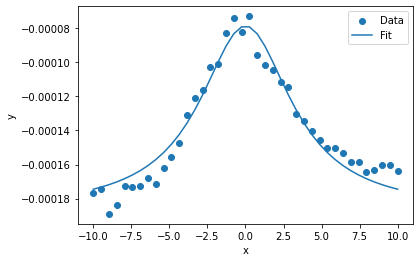

6316.474209052536
200.5229907635694
[6416.484949010695, 73.32218117364658, 0.00010862431601053036, -0.00018728704491031512]
[1.1696607117479632, 6.767515094032287, 4.66124033895216e-06, 4.5014151632498415e-06]


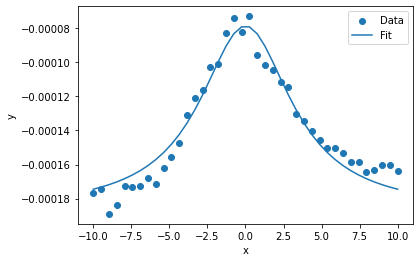

In [787]:
#Doppler6
p1,er1=parameters(xaxis, np.array(minus),1260,1300,5,40)
print(p1)
print(er1)
X=str(round(p1[0],3)) +str(" \pm ")+ str(round(er1[0],3))
G=str(round(p1[1],3)) +str(" \pm ")+ str(round(er1[1],3))
A=str(p1[2]) +str(" \pm ")+ str(er1[2])
Off=str(p1[3]) +str(" \pm ")+ str(er1[3])
XList.append(X)
GList.append(G)
AList.append(A)
OffList.append(Off)
fitydatad6=fitgenerator(np.array(minus),1260,1300)[2]
xd6=xaxis[1260:1300]

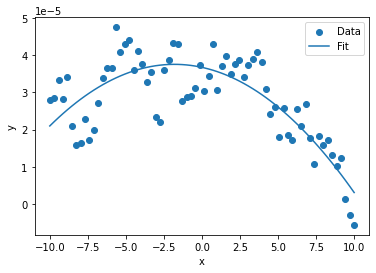

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


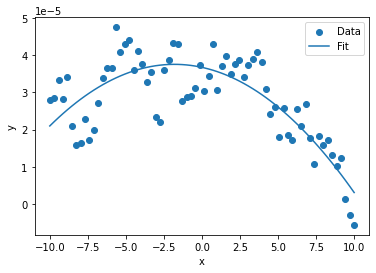

7770.265892088435
350.915233836251
[7852.147533534132, 34209.02536066597, 0.235359637578622, -0.2353220514256911]
[5.987067932339122, nan, nan, nan]


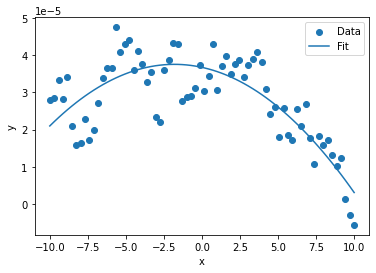

In [788]:

    #Doppler7
p1,er1=parameters(xaxis, np.array(minus),1550,1620,5,40)
print(p1)
print(er1)
X=str(round(p1[0],3)) +str(" \pm ")+ str(round(er1[0],3))
G=str(round(p1[1],3)) +str(" \pm ")+ str(round(er1[1],3))
A=str(p1[2]) +str(" \pm ")+ str(er1[2])
Off=str(p1[3]) +str(" \pm ")+ str(er1[3])
XList.append(X)
GList.append(G)
AList.append(A)
OffList.append(Off)
fitydatad7=fitgenerator(np.array(minus),1550,1620)[2]
xd7=xaxis[1550:1620]

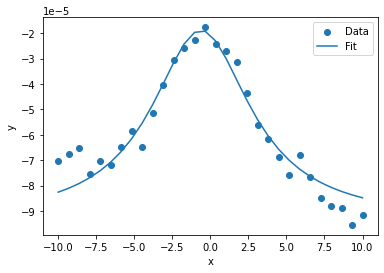

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


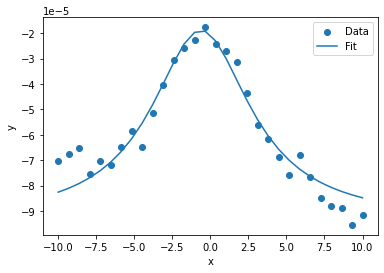

9073.665332051656
150.3922430726816
[9167.469127676353, 59.69963474395878, 7.513114887925134e-05, -9.399006093469942e-05]
[1.2423529008524625, 7.607252351932308, 4.550913560671743e-06, 4.594644641507962e-06]


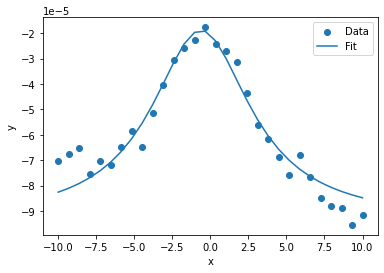

In [831]:
#Doppler8
p1,er1=parameters(xaxis, np.array(minus),1810,1840,5,40)
print(p1)
print(er1)
X=str(round(p1[0],3)) +str(" \pm ")+ str(round(er1[0],3))
G=str(round(p1[1],3)) +str(" \pm ")+ str(round(er1[1],3))
A=str(p1[2]) +str(" \pm ")+ str(er1[2])
Off=str(p1[3]) +str(" \pm ")+ str(er1[3])
XList.append(X)
GList.append(G)
AList.append(A)
OffList.append(Off)
fitydatad8=fitgenerator(np.array(minus),1810,1840)[2]
xd8=xaxis[1810:1840]

Text(0, 0.5, 'Relative Power')

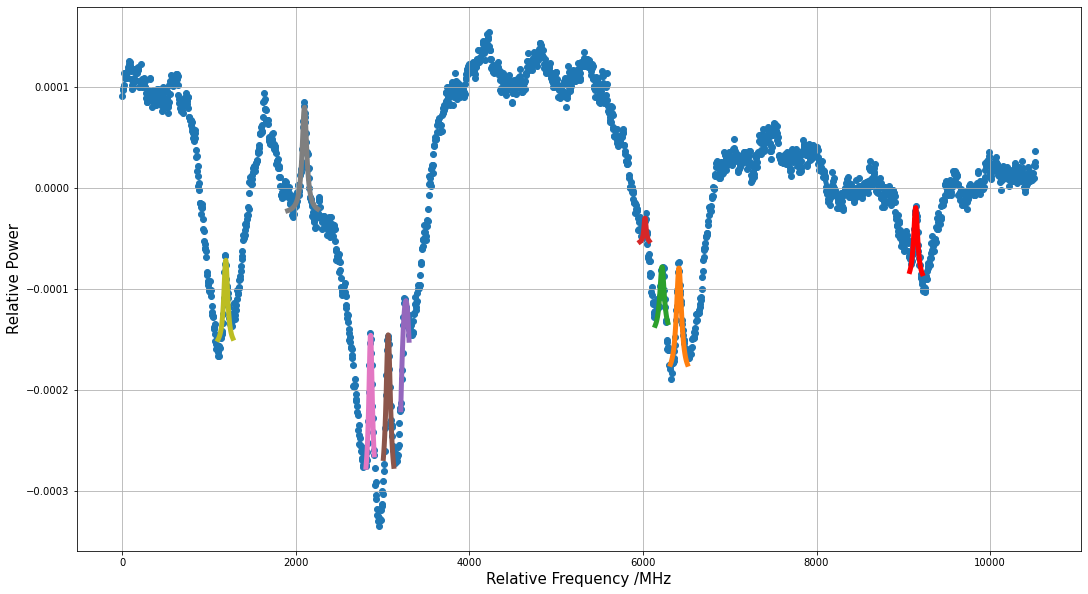

In [790]:
plt.figure(figsize=(18,10))
plt.grid()
plt.plot(xd8,fitydatad8,"r", linewidth=5,label="Peak 10")
plt.plot(xd7,fitydatad7, linewidth=5,label="Peak 9")
plt.plot(xd6,fitydatad6, linewidth=5,label="Peak 8")

plt.plot(xc2,fitydatac2, linewidth=5,label="Peak 7")
plt.plot(xd5,fitydatad5, linewidth=5,label="Peak 6")
plt.plot(xd4,fitydatad4, linewidth=5,label="Peak 5")

plt.plot(xc1,fitydatac1, linewidth=5,label="Peak 4")
plt.plot(xd3,fitydatad3, linewidth=5,label="Peak 3")
plt.plot(xd2,fitydatad2, linewidth=5,label="Peak 2")
plt.plot(xd1,fitydatad1, linewidth=5,label="Peak 1")


plt.scatter(xaxis, np.array(minus))
plt.xlabel("Relative Frequency /MHz",fontsize=15)
plt.ylabel("Relative Power",fontsize=15)
#plt.legend(fontsize=15)

In [791]:
XList

['1193.885 \\pm 1.797',
 '2100.552 \\pm 1.29',
 '2862.883 \\pm 0.4',
 '3065.893 \\pm 1.161',
 '3348.799 \\pm 1.82',
 '6006.654 \\pm 4.895',
 '6221.623 \\pm 3.002',
 '6416.485 \\pm 1.17',
 '7852.148 \\pm 5.987',
 '9167.469 \\pm 1.242']

In [801]:
GList

['56.284 \\pm 9.356',
 '65.368 \\pm 5.07',
 '52.538 \\pm 3.117',
 '65.81 \\pm 9.399',
 '-9148.023 \\pm nan',
 '33.453 \\pm 24.086',
 '64.564 \\pm 19.689',
 '73.322 \\pm 6.768',
 '34209.025 \\pm nan',
 '59.7 \\pm 7.607']

In [793]:
AList

['8.623151728437924e-05 \\pm 6.602744649192863e-06',
 '0.00010574403064603802 \\pm 4.276198575350285e-06',
 '0.00016128350792974936 \\pm 5.3156622106533e-06',
 '0.00016162825311411398 \\pm 1.2991918844441214e-05',
 '0.5771551203979252 \\pm nan',
 '2.5694950903291043e-05 \\pm 8.612775113258932e-06',
 '6.753725785478937e-05 \\pm 1.0129789371090527e-05',
 '0.00010862431601053036 \\pm 4.66124033895216e-06',
 '0.235359637578622 \\pm nan',
 '7.513114887925134e-05 \\pm 4.550913560671743e-06']

In [794]:
OffList

['-0.00015739941704266656 \\pm 5.680688337771409e-06',
 '-2.520683577491641e-05 \\pm 2.077051908924358e-06',
 '-0.0003058165272423756 \\pm 5.840471404505628e-06',
 '-0.0003068749993910801 \\pm 1.436061771090726e-05',
 '-0.5772666197707601 \\pm nan',
 '-5.490806926439571e-05 \\pm 6.844418935850575e-06',
 '-0.00014523147747677332 \\pm 1.063093111961177e-05',
 '-0.00018728704491031512 \\pm 4.5014151632498415e-06',
 '-0.2353220514256911 \\pm nan',
 '-9.399006093469942e-05 \\pm 4.594644641507962e-06']

In [795]:
dataa={'X':XList, 'G':GList,'A':AList,'Off':OffList}
dataframe = pd.DataFrame(data=dataa)
dataframe.to_csv('/Users/cansuslu/Desktop/nonlinearparams.csv')

In [821]:
GList

['56.284 \\pm 9.356',
 '65.368 \\pm 5.07',
 '52.538 \\pm 3.117',
 '65.81 \\pm 9.399',
 '-9148.023 \\pm nan',
 '33.453 \\pm 24.086',
 '64.564 \\pm 19.689',
 '73.322 \\pm 6.768',
 '34209.025 \\pm nan',
 '59.7 \\pm 7.607']

In [819]:
sum=0
for i in range(len(GList)):
    print(float(GList[i][9:])/(10**6*377.572))
    sum=sum+float(GList[i][9:])/(10**6*377.572)
    

sum=sum-float(GList[4][0:5])/(10**6*377.572)-float(GList[8][0:5])/(10**6*377.572)



ValueError: could not convert string to float: 'm 9.356'

In [818]:
sum/8

1.5593383513607974e-07

In [829]:
7.607/(10**6*377.572)

2.0147150742110116e-08

In [830]:
9.356+5.07+3.117+9.399+24.086+19.689+6.768+7.607)/(10**6*377.572)/

SyntaxError: unmatched ')' (1343698607.py, line 1)

In [851]:
def saturation(csvpwd):
    df=pd.read_csv(csvpwd)
    y_array=(df["DPO4104"][19:]).to_numpy()
    x_array=(df["Model"][19:]).to_numpy()
    dat=[]
    x=[]
    for i in range(len(y_array)):
        dat.append(float(y_array[i]))
        x.append(float(x_array[i]))
        #x.append(i*0.01)

    dat=np.array(dat)
    x=np.array(x)
    
        

    plt.figure(figsize=(14,10))
    popt6, pcov6= curve_fit(linearfit,x[1500:3600],dat[1500:3600])


    plt.figure(figsize=(8,6))
    plt.scatter(x[1500:3600],dat[1500:3600],label="Measurement")
    plt.plot(x[1500:3600], linearfit(x[1500:3600], *popt6),c='red',label="Linear Fit")
    plt.legend(fontsize=15)
    plt.xlabel("Arbitrary Time Unit",fontsize=14)
    plt.ylabel("Relative Power",fontsize=14)
    plt.grid()
    
    
    plt.plot(x[1500:3600],np.array(dat[1500:3600]))

    minus= dat[1500:3600]-linearfit(x[1500:3600], *popt6)

    plt.show()
    plt.figure(figsize=(14,10))
    plt.plot(np.array(x[1500:3600])*conv-np.array(x[1500])*conv,minus)
    xaxis=(np.array(x[1500:3600])*conv-np.array(x[1500])*conv).tolist()


    p1,er1=parameters(xaxis, np.array(minus),220,255,5,35)        
    fitydatad1=fitgenerator(np.array(minus),220,255)[2]
    xd1=xaxis[220:255]
    
    return p1,er1

<Figure size 1008x720 with 0 Axes>

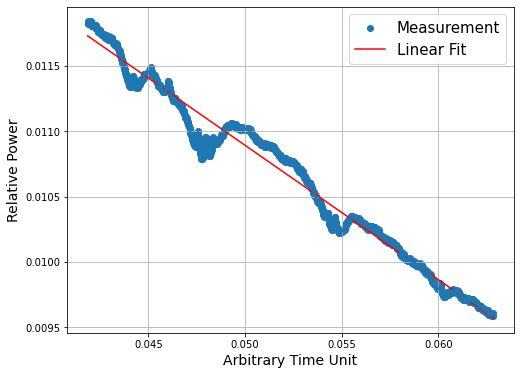

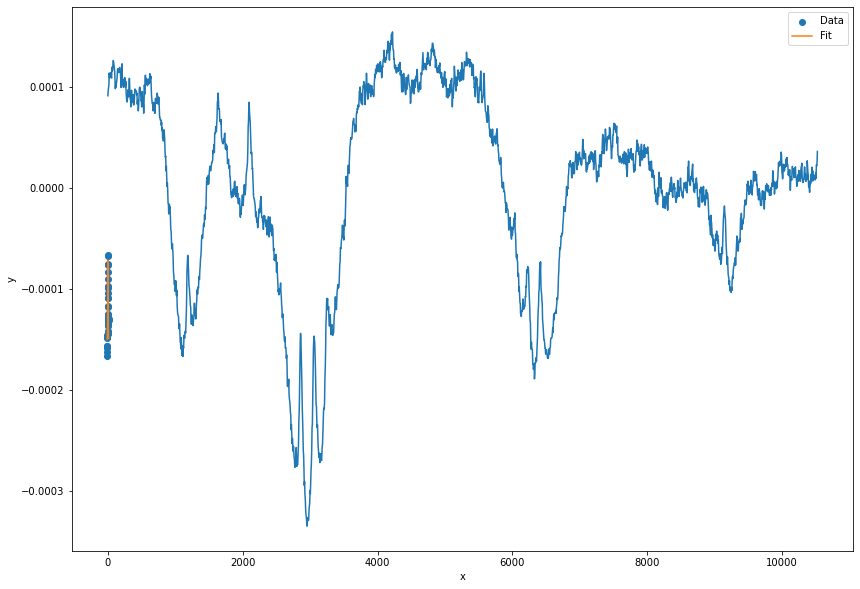

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


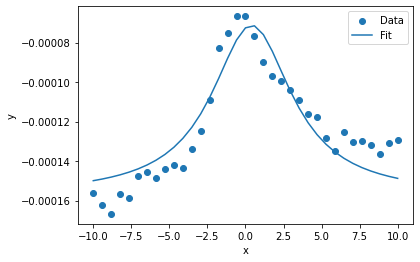

1102.8764491996517
175.45761691812368


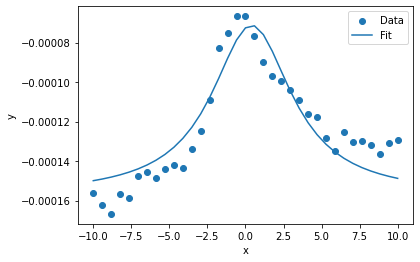

([1193.884764367126,
  56.284371111093584,
  8.623151728437924e-05,
  -0.00015739941704266656],
 [1.7972084840545677,
  9.35573519613839,
  6.602744649192863e-06,
  5.680688337771409e-06])

In [852]:
saturation('Downloads/tek0029CH2.csv')

0.512


<Figure size 1008x720 with 0 Axes>

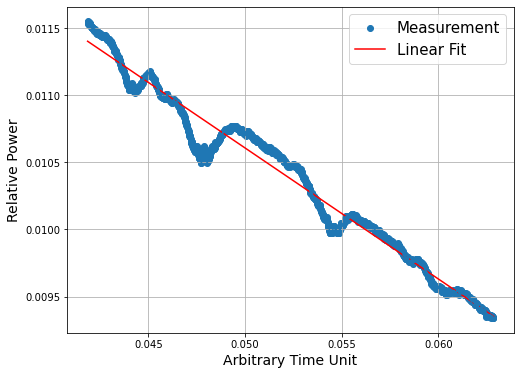

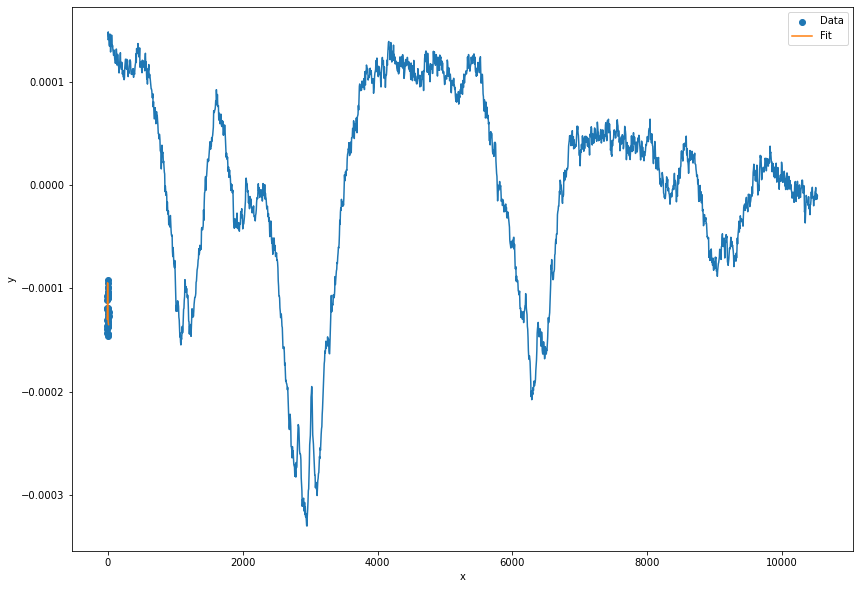

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


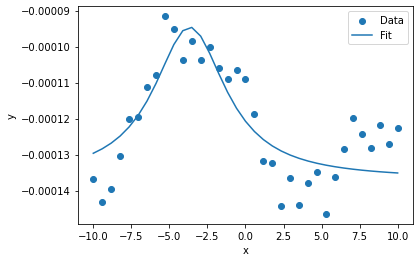

1102.8764491996517
175.45761691812368


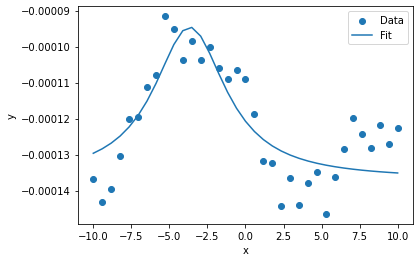

([1158.2796343663006,
  -50.620885941104866,
  4.2343624395917536e-05,
  -0.00013692210130962154],
 [2.8044686182538023,
  12.38753411948287,
  5.168564752480299e-06,
  3.5324038947206092e-06])

In [854]:
print(0.512)
saturation('Downloads/tek0037CH2.csv')

0.321


<Figure size 1008x720 with 0 Axes>

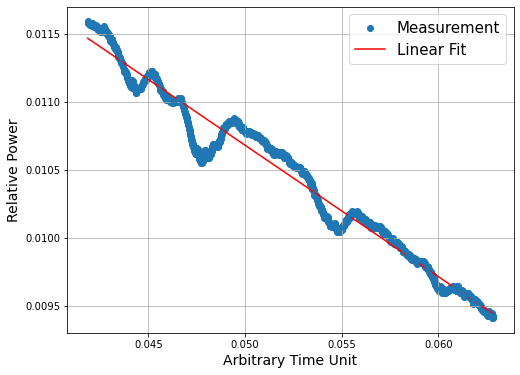

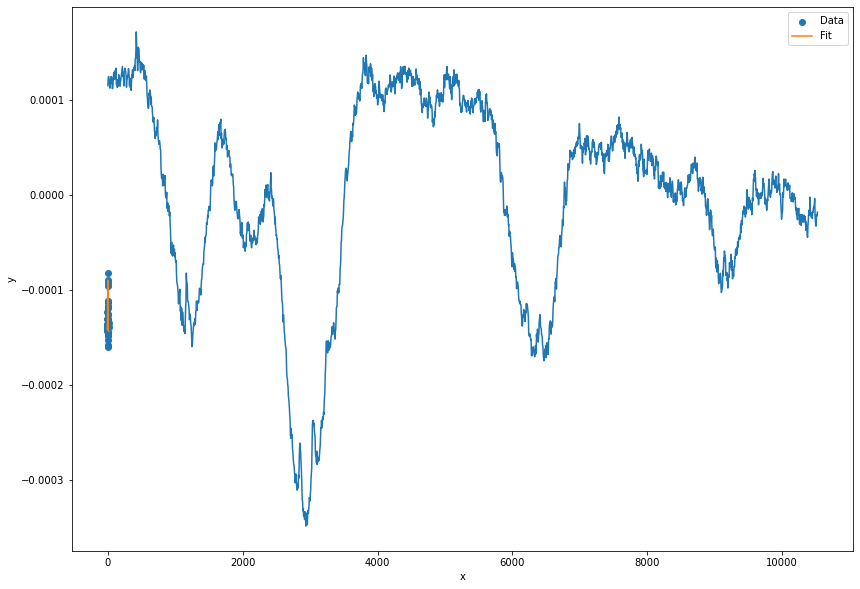

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


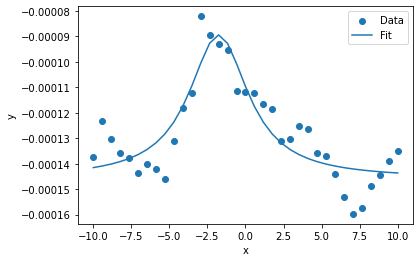

1102.8764491996517
175.45761691812368


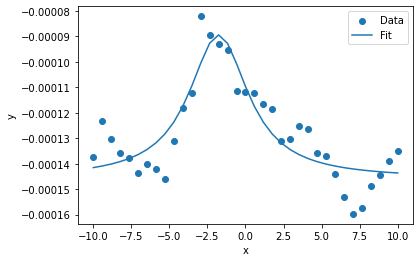

([1174.8935635024493,
  41.50473622096468,
  5.637276292029812e-05,
  -0.00014583948944741382],
 [1.9652362644344474,
  8.40568991392641,
  5.6445921982531815e-06,
  3.445101440525005e-06])

In [855]:
print(0.321)
saturation('Downloads/tek0039CH2.csv')

0.018944


<Figure size 1008x720 with 0 Axes>

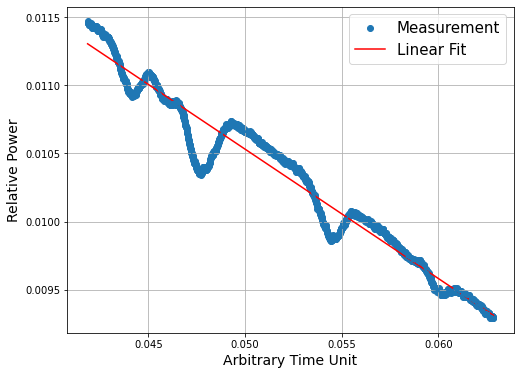

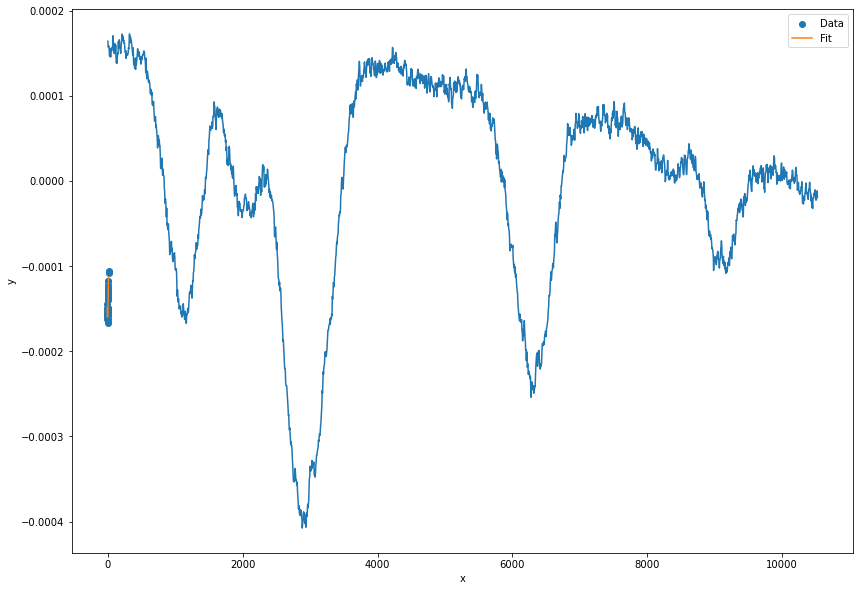

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


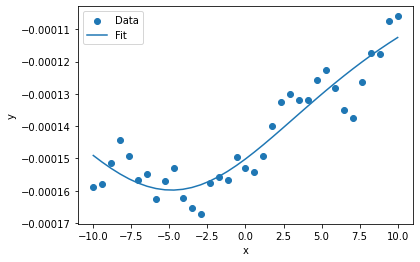

1102.8764491996517
175.45761691812368


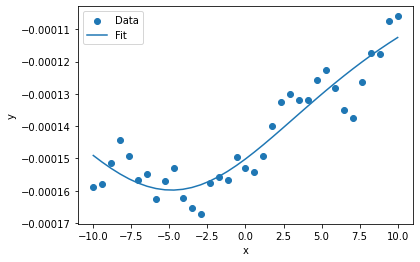

([1147.9365133164936,
  243.24630471408474,
  -8.844973700092369e-05,
  -7.13702452861282e-05],
 [4.952424984937024,
  71.76077907346378,
  2.619645364041772e-05,
  2.723305066908555e-05])

In [856]:
print(0.037*0.512)
saturation('Downloads/tek0049CH2.csv')

0.011877


<Figure size 1008x720 with 0 Axes>

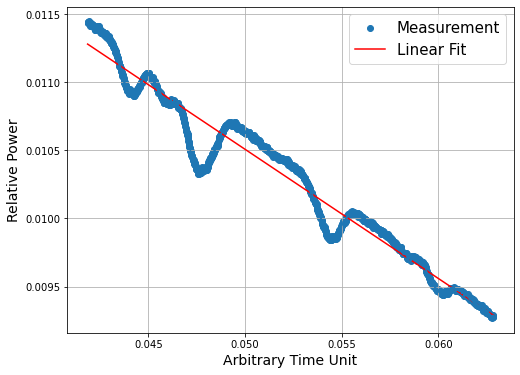

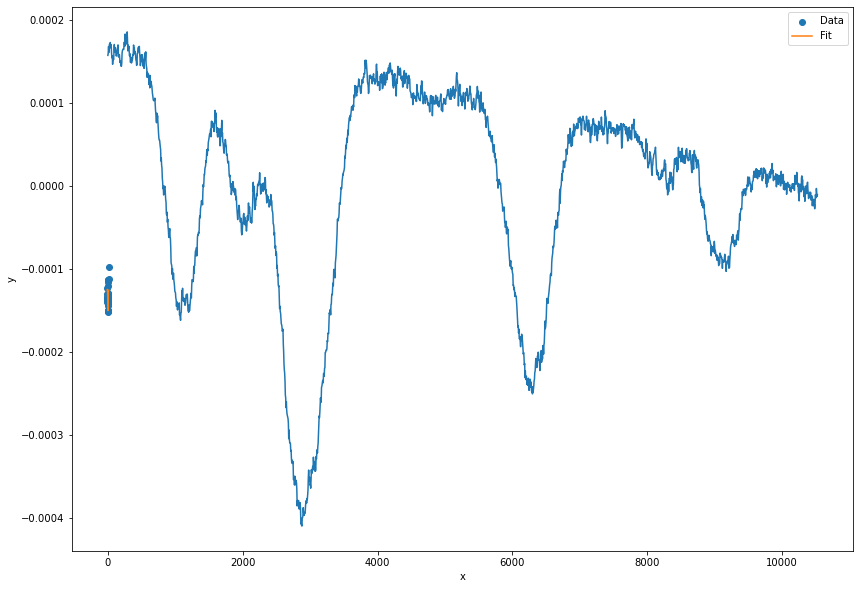

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


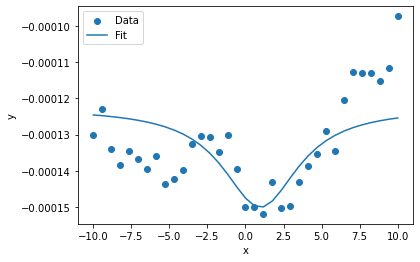

1102.8764491996517
175.45761691812368


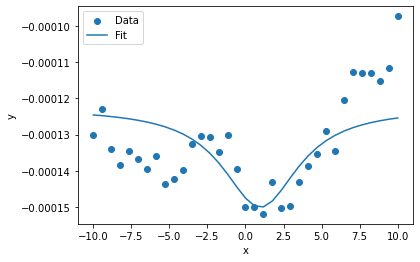

([1198.8904015148805,
  53.26599595462299,
  -2.745280534670066e-05,
  -0.00012261379954286842],
 [5.069443821644738,
  25.206699637763485,
  6.042348846461291e-06,
  4.883323875750757e-06])

In [857]:
print(0.037*0.321)
saturation('Downloads/tek0047CH2.csv')

0.006081024


<Figure size 1008x720 with 0 Axes>

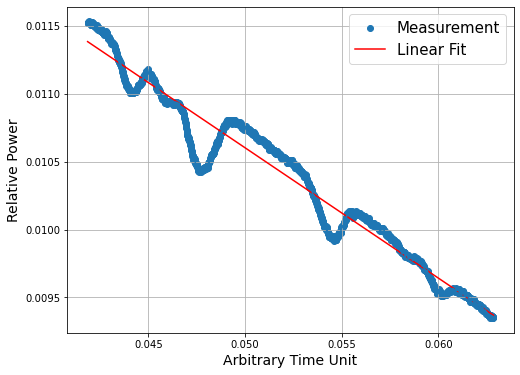

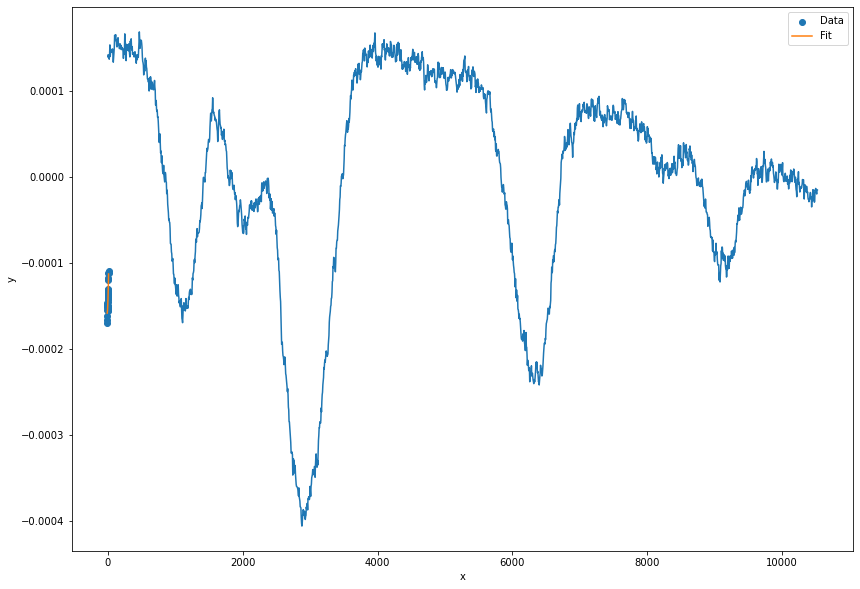

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


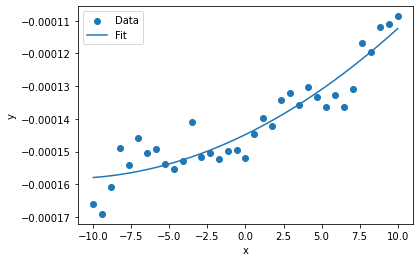

1102.8764491996517
175.45761691812368


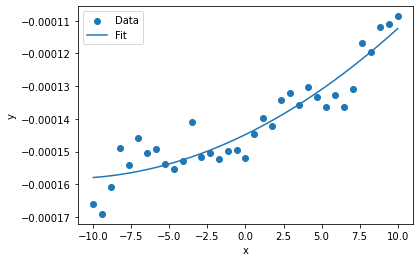

([1086.8470044999558,
  27306.375016167083,
  -0.23319654709048893,
  0.233038261284813],
 [33.48777338482453, nan, nan, nan])

In [858]:
print(0.037*0.512*0.321)
saturation('Downloads/tek0048CH2.csv')

In [872]:
def saturation(csvpwd):
    df=pd.read_csv(csvpwd)
    y_array=(df["DPO4104"][19:]).to_numpy()
    x_array=(df["Model"][19:]).to_numpy()
    dat=[]
    x=[]
    for i in range(len(y_array)):
        dat.append(float(y_array[i]))
        x.append(float(x_array[i]))
        #x.append(i*0.01)

    dat=np.array(dat)
    x=np.array(x)
    
        

    plt.figure(figsize=(14,10))
    popt6, pcov6= curve_fit(linearfit,x[1500:3600],dat[1500:3600])


    plt.figure(figsize=(8,6))
    plt.scatter(x[1500:3600],dat[1500:3600],label="Measurement")
    plt.plot(x[1500:3600], linearfit(x[1500:3600], *popt6),c='red',label="Linear Fit")
    plt.legend(fontsize=15)
    plt.xlabel("Arbitrary Time Unit",fontsize=14)
    plt.ylabel("Relative Power",fontsize=14)
    plt.grid()
    
    
    plt.plot(x[1500:3600],np.array(dat[1500:3600]))

    minus= dat[1500:3600]-linearfit(x[1500:3600], *popt6)

    plt.show()
    plt.figure(figsize=(14,10))
    plt.plot(np.array(x[1500:3600])*conv-np.array(x[1500])*conv,minus)
    xaxis=(np.array(x[1500:3600])*conv-np.array(x[1500])*conv).tolist()


    p1,er1=parameters(xaxis, np.array(minus),220,235,5,15)        
    fitydatad1=fitgenerator(np.array(minus),220,235)[2]
    xd1=xaxis[220:235]
    
    return p1,er1

0.15695615999999998


<Figure size 1008x720 with 0 Axes>

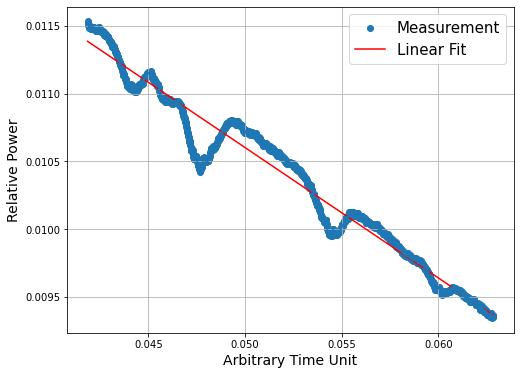

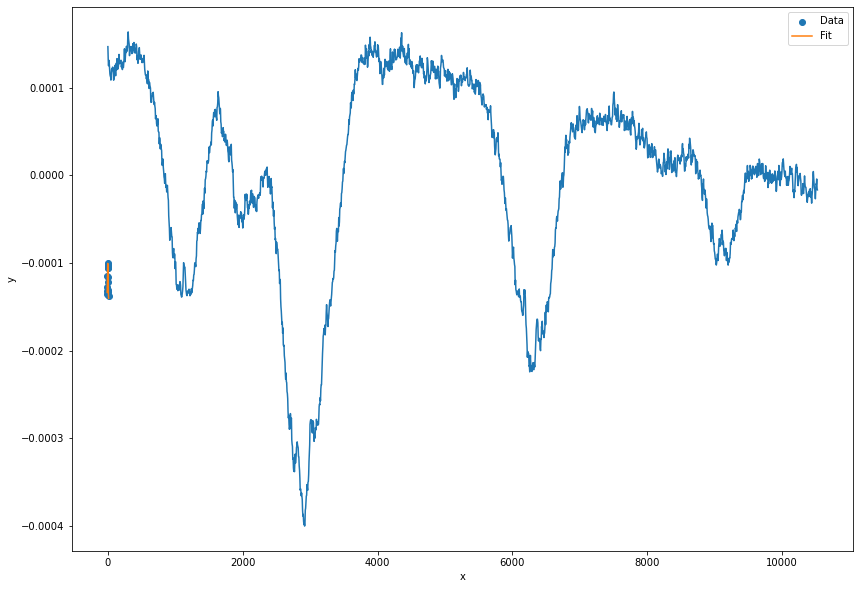

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


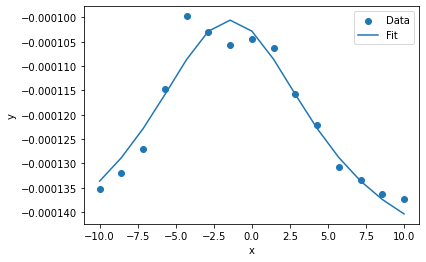

1102.8764491996517
75.19612153633716


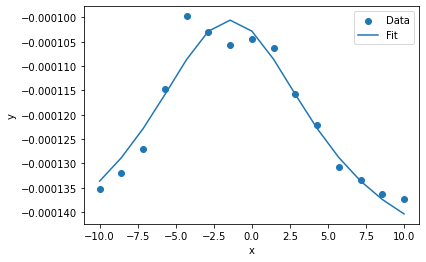

([1135.0355024394858,
  51.33474620643699,
  5.40658962178733e-05,
  -0.00015462491700290733],
 [0.9892399684874641,
  10.157053671326588,
  7.434941465966049e-06,
  8.164593242672858e-06])

In [873]:
print(0.321*0.512*0.955)
saturation('Downloads/tek0046CH2.csv')

In [ ]:
print(0.321*0.512)
saturation('Downloads/tek0045CH2.csv')

In [ ]:
print(0.037*0.512)
saturation('Downloads/tek0049CH2.csv')


0.037


<Figure size 1008x720 with 0 Axes>

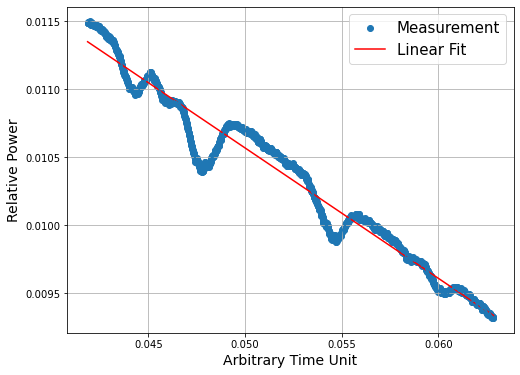

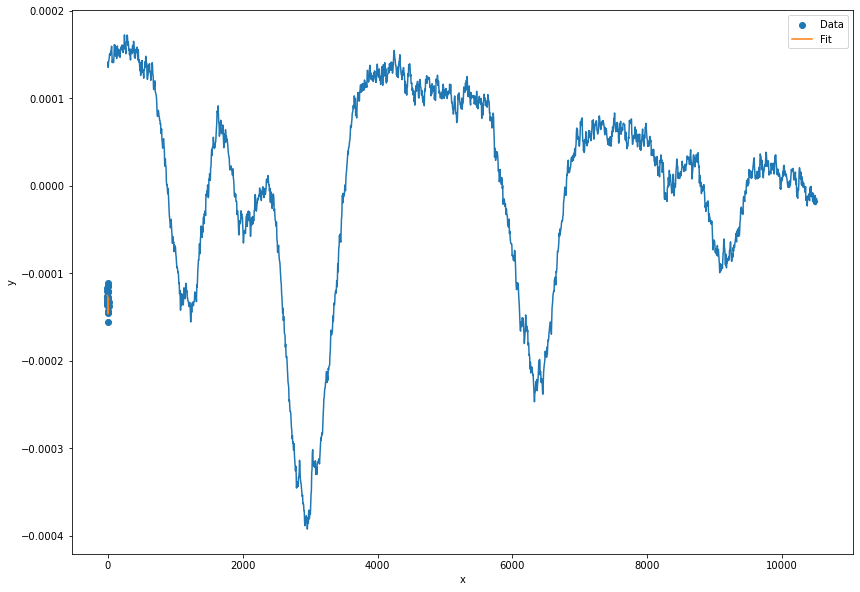

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


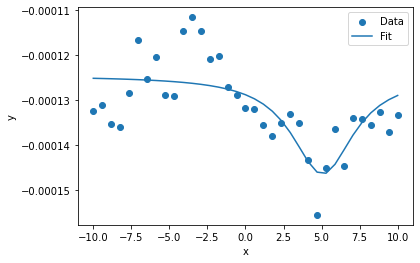

1102.8764491996517
175.45761691812368


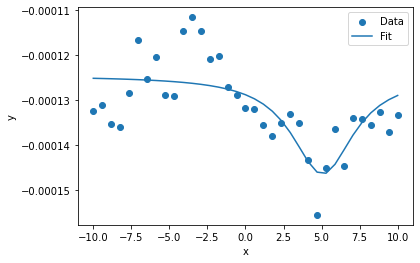

([1234.6454115877202,
  43.42736989927123,
  -2.195033250921802e-05,
  -0.00012459603920138783],
 [3.665201172478195,
  14.633926446229331,
  3.905463541625294e-06,
  2.1366490021566555e-06])

In [859]:
print(0.037)
saturation('Downloads/tek0041CH2.csv')

0.035335


<Figure size 1008x720 with 0 Axes>

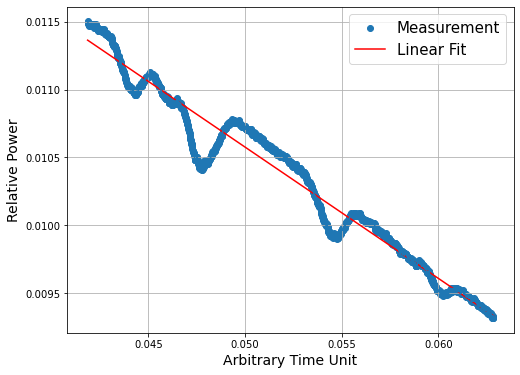

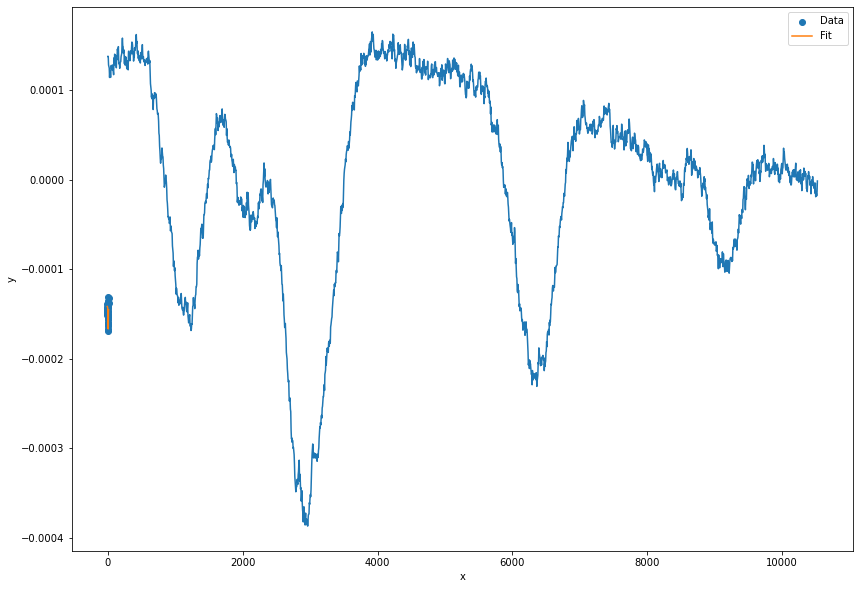

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


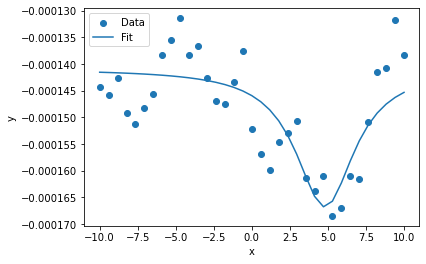

1102.8764491996517
175.45761691812368


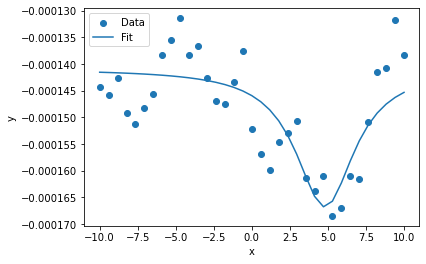

([1232.3827235657723,
  41.355669573059906,
  -2.589484882339e-05,
  -0.00014091980946840852],
 [2.9877996577452097,
  11.812328472942285,
  3.924860455206265e-06,
  2.089051735886597e-06])

In [860]:
print(0.037*0.955)
saturation('Downloads/tek0042CH2.csv')

0.306555


<Figure size 1008x720 with 0 Axes>

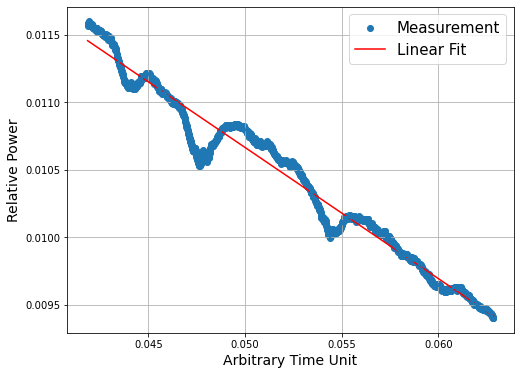

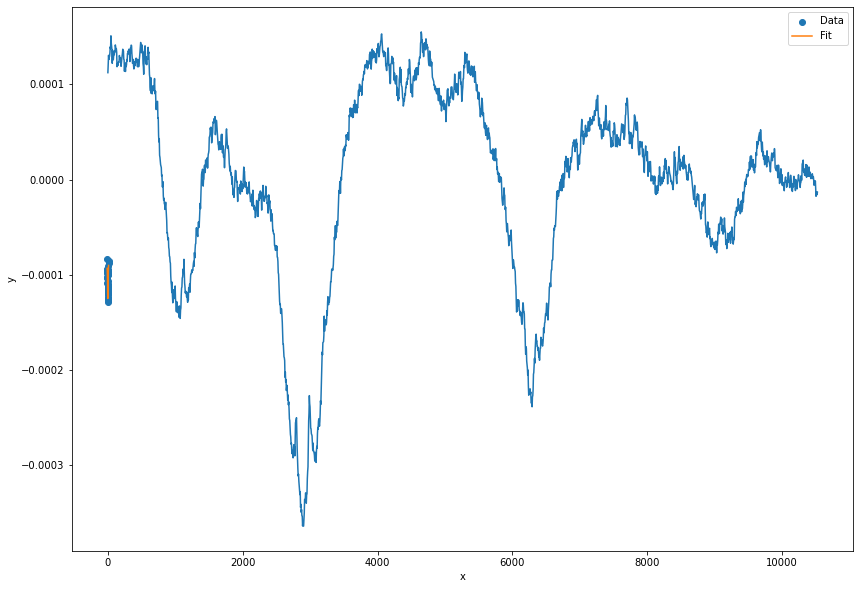

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


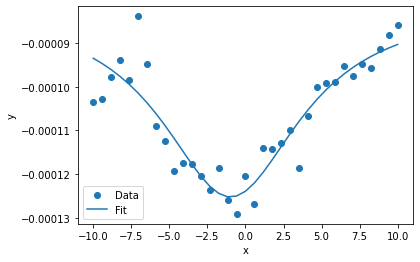

1102.8764491996517
175.45761691812368


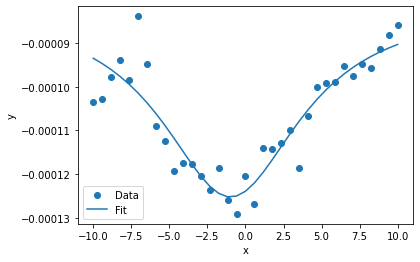

([1181.7684304099455,
  98.03707212495364,
  -4.392331593773354e-05,
  -8.130723090454302e-05],
 [2.3293964262725693,
  20.203946886914203,
  5.426635302018314e-06,
  6.007968976767085e-06])

In [861]:
print(0.321*0.955)
saturation('Downloads/tek0040CH2.csv')

0.48896


<Figure size 1008x720 with 0 Axes>

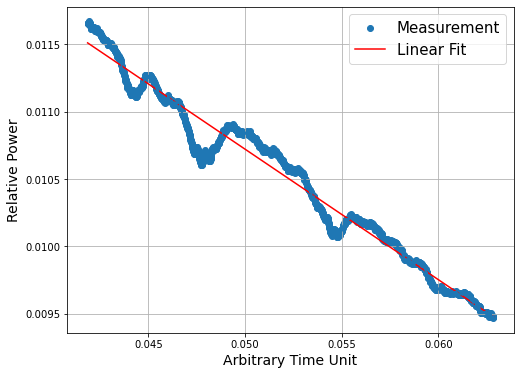

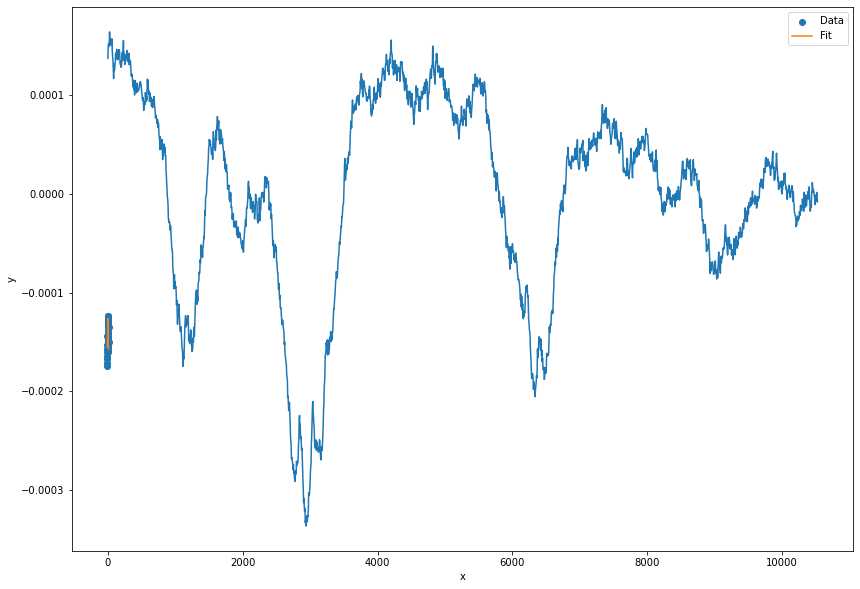

/var/folders/0k/9w5t1z391b5fh42lk4bjw4nh0000gn/T/ipykernel_3786/1633510999.py:3: RuntimeWarning: invalid value encountered in sqrt
  covs=np.sqrt(fitgenerator(dat,xmin,xmax)[1])


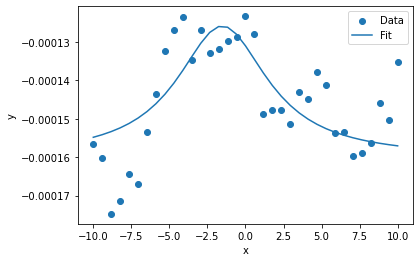

1102.8764491996517
175.45761691812368


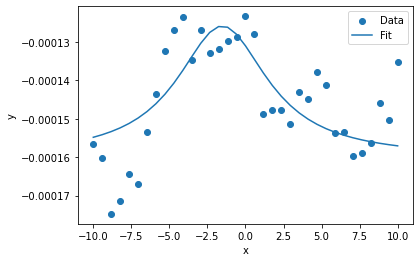

([1177.008224085191,
  63.7010187792859,
  3.4279030731673745e-05,
  -0.00016013617192893136],
 [4.369509358054511,
  24.17969397178866,
  6.124262826891515e-06,
  5.70200537181377e-06])

In [862]:
print(0.512*0.955)
saturation('Downloads/tek0038CH2.csv')

In [883]:
v=[1193.884 ,1158.279,1177.008,1174.893,1135.035,1147,1198]
v2=np.array(v)**2
att=[1,0.512,0.48896,0.321,0.15695,0.0189,0.011877]
g=[46,50.621,63.701,41.505,51.335,53.266]

ValueError: x and y must be the same size

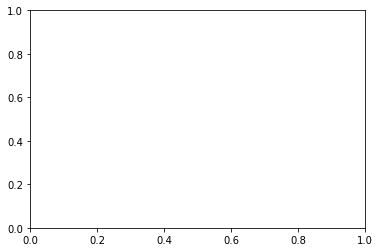

In [884]:
plt.scatter(att,np.array(g)**2)

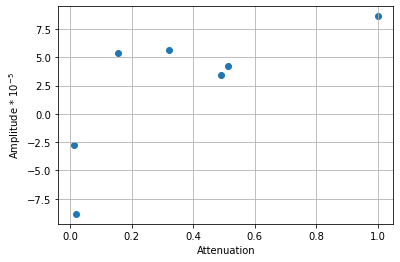

<Figure size 1008x720 with 0 Axes>

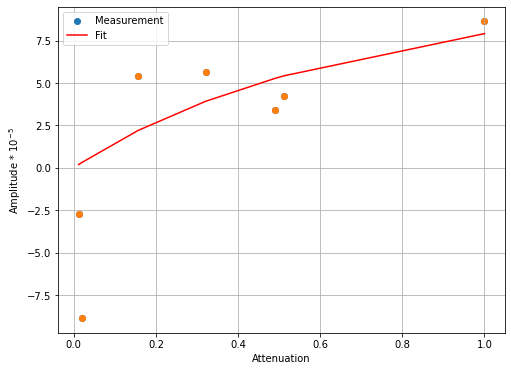

In [899]:


A=np.array([8.623,4.234,3.428,5.637,5.407,-8.8445,-2.745])
Ae=np.array([0.660,0.517,0.612,0.564,0.743,2.619,0.604])

att=np.array(att)
plt.scatter(att,A)
plt.grid()
plt.xlabel("Attenuation")
plt.ylabel(r"Amplitude * $10^{-5}$")

def linearfit(P,k0,P_sat):
    return(k0*P/P_sat)/(1+P/P_sat)




plt.figure(figsize=(14,10))
popt6, pcov6= curve_fit(linearfit,att,A)


plt.figure(figsize=(8,6))
plt.scatter(att,A,label="Measurement")
plt.plot(att, linearfit(att, *popt6),c='red',label="Fit")

plt.scatter(att,A)
plt.grid()
plt.xlabel("Attenuation")
plt.ylabel(r"Amplitude * $10^{-5}$")
plt.legend()

In [900]:
print(popt6,np.sqrt(pcov6))

[15.23446577  0.92653802] [[33.41195385 10.53358198]
 [10.53358198  3.37684665]]
